# Исследование рынка компьютерных игр 

Нам предоставлена выгрузка из открытых источников с историческими данными о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Это и есть параметры, с которыми нам и предстоит работать.

Исходные данные представлены за большой промежуток времени, в ходе исследования нам необходимо выбрать наиболее актуальный период из этих данных.

**Цель исследования**:

Выделить закономерности, позволяющие определить успешность игр, которые продает онлайн-магазин "Стримчик". Это нужно для того, чтобы выбрать потенциально популярный продукт и спланировать для него все необходимые инвестиции (рекламные кампании).


**Описание данных:**

- **Name** - название игры
- **Platform** - название игровой платформы
- **Year_of_Release** - год релиза
- **Genre** - жанр
- **NA_sales** - продажи в Северной Америке
- **EU_sales** - продажи в Европе
- **JP_sales** - продажи в Японии
- **Other_sales** - продажи в других регионах
- **Critic_Score** - оценка критиков
- **User_Score** - оценка пользователей
- **Rating** - возрастной рейтинг

**Ход исследования:** <a id='section0.100'></a>

* [1. Импорт данных, библиотек, первичное ознакомление](#section0.1)
* [2. Предобработка данных](#section0.2)
* [3. Исследовательский анализ данных](#section0.3)
* [4. Портрет пользователя каждого региона](#section0.4)
* [5. Проверка гипотез](#section0.5)
* [6. Общий вывод по работе](#section0.6)


## 1. Импорт данных, библиотек, первичное ознакомление <a id='section0.1'></a>

In [67]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [68]:
# библиотека, позволяющая наглядно изобразить отсутствующие данные в нашей таблице
%pip install missingno -q
import missingno as msno

Note: you may need to restart the kernel to use updated packages.


In [69]:
# если можно, открываем файл из локального носителя
# или с Jupyter Hub
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [70]:
# ознакомимся с таблицей
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [72]:
# Ознакомимся с метриками описательной статистики
display(df.describe())

# а также посмотрим описание нечисловых значений таблицы
df.describe(include=['object'])

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


**Резюмируем особенности, выделим элементы, с которыми необходимо провести работу:**

* В нашей таблице 16715 строк и 11 столбцов;


* Переименуем столбцы согласно общепринятым установкам (приведем к нижнему регистру), также изменим название столбца "Rating" на "rating_esrb" (для личного удобства);


* Не во всех столбцах на данный момент тип данных соответствует значению ячеек: в дальнейшей работе проведем корректировку;


* Во многих столбцах встречаются пропуски значений: попробуем исследовать причины их появления, устранить по-возможности;


* Проверим наличие дубликатов в нашей таблице;

    
    
    Это то, что можно увидеть по первичному ознакомлению.

## 2. Предобработка данных <a id='section0.2'></a>

[Обратно к содержанию](#section0.100)

**Производить предобраобтку будем от простого к сложному.** 

Наш план:
1. Приведем в порядок названия столбцов


2. Обработаем пропуски


3. Поменяем тип данных в колонках, там, где это необходимо


4. Проверим присутствие дубликатов


5. По условиям задания нам необходимо добавить суммы продаж игр во всех регионах в значения нового столбца. Назовем этот столбец `total_sales` 



**Изменение названия столбцов**

In [73]:
# переводим все названия в нижний регистр
df.columns = [x.lower() for x in df.columns]

In [74]:
# переименуем колонку с возрастным рейтингом ESRB для более ясного понимания содержания
df = df.rename(columns={'rating':'rating_esrb'})

In [75]:
# проверим результат
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Обработка пропусков**

С помощью библиотеки missingno посмотрим, как пропущены значения в нашей таблице:

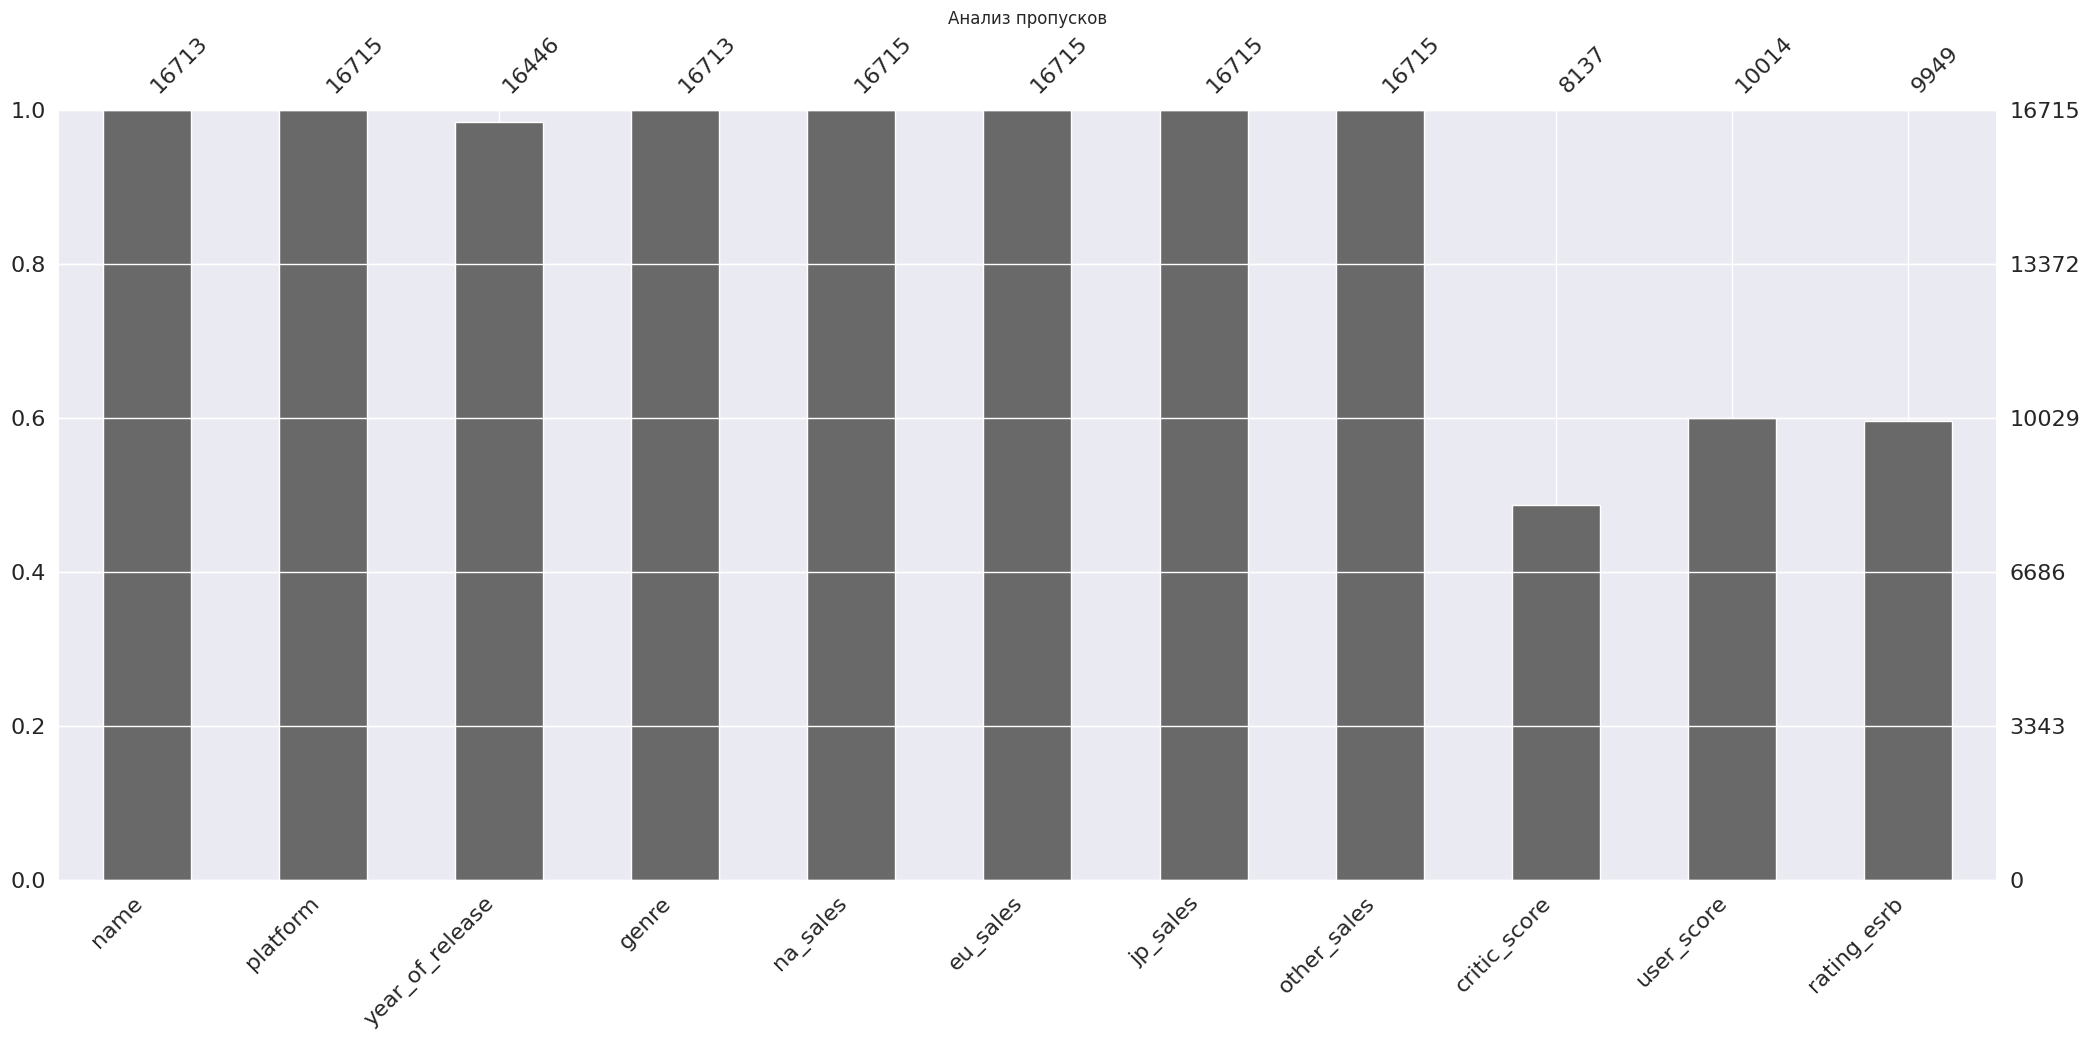

In [76]:
plt.title('Анализ пропусков')
msno.bar(df);


Всего в наших данных пропущено 12,1% значений. В колонках `name` и `genre` отсутствуют по 2 значения. Удалим эти строки.

В колонке `year_of_release` пропущено 269 значений, что составляет всего 1,6% от данных в этой колонке. Количество небольшое, поэтому можем также их удалить.

Самое большое количество пропусков наблюдается в колонках с оценками пользователей, оценками критиков, а также возрастным рейтингом ESRB. Есть несколько вариантов работы с пропусками в этих колонках. Опишем их ниже, выберем один из них и опишем, почему сделали так:

* удалить все пропущенные значения - **не подходит** в нашем случае

В столбцах `critic_score`,`user_score`,`rating_esrb` 8578, 6701 и 6766 пропусков соответственно. Это от 40 до 51 % всех значений в каждом столбце, что слишком много для удаления.

* заполнить значения фиксированным, например, -1 или -100

Для дальнейшего обучения моделей NaN-значения будут нам мешать, поэтому их можно заполнить заранее выбранными фиксированными значениями. В нашей работе мы не будем строить модели, поэтому мы выберем следующий вариант.

* оставляем пустые значения - **выбираем этот способ**

Мы не можем заполнять пропуски в нашей таблице синтетическими значениями, так это напрямую повлияет на результаты исследования. Мы не можем додумывать за пользователей оценки, на основании каких-либо метрик, так как все игры индивидуальны, как в общем случае, так и в случае разделения на группы по какому-либо признаку (т.е. в жанре Action могут быть как высоко оцененные игры, так и не очень. Так и в другим играх)


**Возможные причины возникновения пропусков**:

* колонки `name` и `genre`

In [77]:
df.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Два значения с абсолютно неясными названиями игр для сеги. Обе выпущены в далеком 1993 году. Возможно, при заполнении таблицы был пропуск, что может быть связано с человеческим фактором.

* колонка `year_of_release`

In [78]:
df.query('year_of_release != year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Здесь пропуски также могут быть связаны с изначальным заполнением данных либо с последующей выгрузкой этих данных.

* колонки `critic_score`,`user_score`,`rating_esrb`

Помимо причин, описаных в предыдущих пунктах, здесь есть еще одна: оценки и отзывы на любые продукты появляются с развитием индустрии. При анализе пропусков можно заметить, что чуть меньше 20% пропусков в этих столбцах приходится на более давние годы выпуска игр.

А также здесь необходимо отметить, что возрастной рейтинг ESRB появился в 1994 году, а устойчивую распространенность получил к 2003 году (по данным из Wiki). Что также связано с пропусками в столбце `rating_esrb`.

**Удаление пропусков**

In [79]:
df = df.query('name == name')
df = df.query('year_of_release == year_of_release').reset_index(drop=True)

In [80]:
# проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating_esrb      9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Важное дополнительное замечание**:

В колонке `user_score` имеются ячейки, в которых содержится аббревиатура "tbd".

Данное сокращение в игровом мире означает "To Be Decided" или "To Be Determined" - в переводе "Будет определено". 

Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Причина возникновения такого обозначения в нашей таблице может заключаться в том, что данные были выгружены до официального релиза игры, и, соответственно, данных с оценками пользователей не было.

Во избежании путаницы и для дальнейшей возможности использовать оценки из этой колонки (нам необходимо поменять тип данных, значение "tbd" нам не позволит) мы приведем значения ячеек с "tbd" к NaN-значениям.

In [81]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [82]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

**Изменение типа данных**

Поменяем тип данных в cтолбцах:
- `year_of_release` на int(на вешьу не меняем, потому что нам важен только год);
- `user_score` на float.

In [83]:
df['user_score'] = df['user_score'].astype(float)
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

In [84]:
# проверим, все ли получилось
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating_esrb      9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


**Проверка на дубли**

In [85]:
df.duplicated().sum()

0

**Добавление столбца `total_sales`**

In [86]:
# добавим новый столбец на конкретную позицию
df.insert(8, 'total_sales', value=0)

In [87]:
# просуммируем продажи во всех регионах и добавим в значение нового столбца
df['total_sales'] = df.eval('na_sales + eu_sales + jp_sales + other_sales')

In [88]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN


**Промежуточный вывод**:

На данном этапе мы подготовили данные для дальнейшего исследования, а именно:
- заменили названия столбцов;
- изменили тип данных в двух колонках;
- частично удалили строки с пропусками, а в колонках, где нелогично использовать для заполнения пропусков медианные/средние значения, оставили пропуски; 
- добавили новый столбец с суммой продаж во всех регионах.

## 3. Исследовательский анализ данных <a id='section0.3'></a>

[Обратно к содержанию](#section0.100)

В ходе EDA мы ответим на ряд следующих вопросов:
* **[a) Cколько игр выпускалось в разные годы? Важны ли данные за все периоды?](#section0.31)**
* **[б) Как менялись продажи по платформам?](#section0.32)**
* **[в) Выберем актуальный период, ориентируясь на прогноз продаж в 2017 году.](#section0.33)**
* **[г) Лидеры продаж среди платформ. Стадия развития, падения, потенциального роста.](#section0.34)**
* **[д) Построим box-plot по продажам, разбив данные по платформам.](#section0.35)**
* **[е) Проанализируем влияние отзывов на продажи на различных платформах.](#section0.36)**
* **[ж) Выделим самые прибыльные жанры, ознакомимся с различиями прибыльных и не очень жанров.](#section0.37)**


### a) Cколько игр выпускалось в разные годы? Важны ли данные за все периоды?<a id='section0.31'></a>

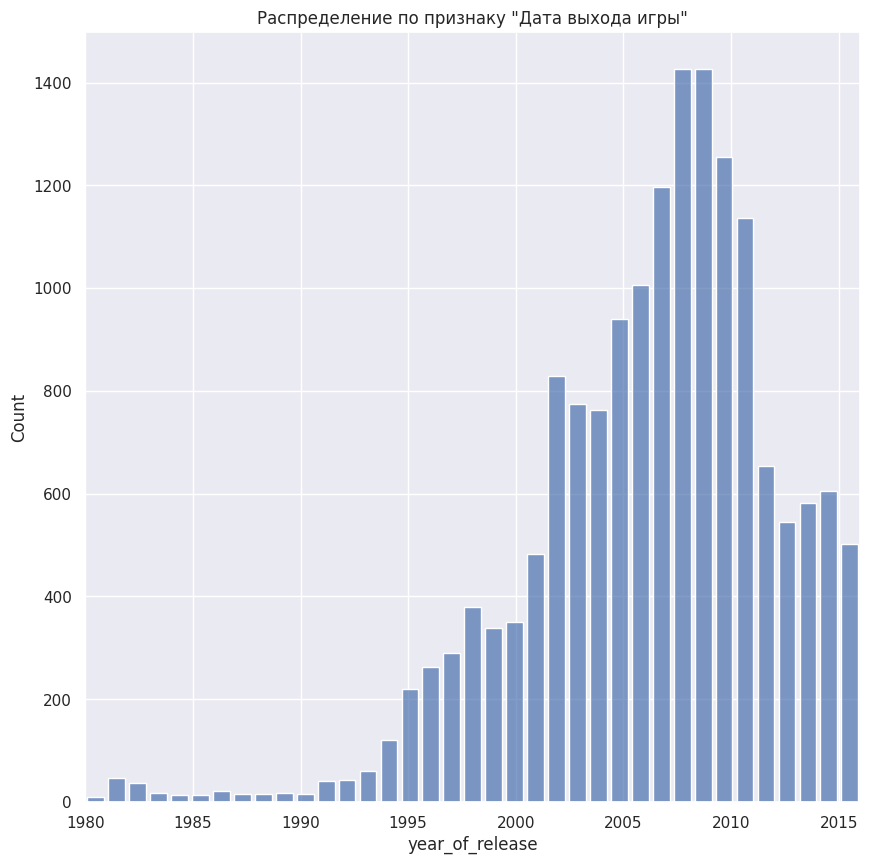

In [89]:
# построим диаграмму выхода игр по годам
plt.figure(figsize=(10, 10))
plt.xlim(1980, 2016) 
plt.title('Распределение по признаку "Дата выхода игры"')
sns.histplot(df['year_of_release'], alpha=0.7, bins=37, shrink=.8);

**Ответ:**<a id='section0.311'></a>

По графику можно проследить, что заметное развитие индустрии начинается с 1994 года.

С тех пор каждый год компьютерных игр выпускалось больше (в основном), также были небольшие остановки в 1999, 2003 - 2004 годах.

Пик выпуска игр пришелся на 2008 - 2009 гг. Период, когда игр выпускалось более тысячи в год, характеризуется с 2006 по 2011 гг. 

В 2012 заметен сильный спад (около 40%) на рынке видеоигр. 2013 год был чуть хуже, после последовал рост. Но в 2016 году выпуск игр заметно просел. 

**Можно предположить**, что данный спад связан с развитием высокоскоростного интернета, а в связи с этим с изменением заработка на видеоиграх: если ранее производители зарабатывали только на продажах игр, то сейчас появилась возможность получать прибыль с микротранзакций, которые пользователи осуществляют в процессе игры (развитие персонажей, приобретение эксклюзивного инвентаря и бонусов, или "pay to win"). Но это только предположение, которое не отвечает на поставленный вопрос. Для развития этой мысли желательно получить данные по прибыли в течении срока поддержки конкретной игры, что в перспективе для нас означает изменение подхода к сбору информации для анализа.

Для выбора актуального для нас периода (чтобы спрогнозировать 2017) желательно взять с 2012 по 2016 гг. Он не будет сильно отличаться внутри себя, не будут выбиваться значения, по сравнению с самыми прибыльными годами игровой индустрии.

### б) Как менялись продажи по платформам?<a id='section0.32'></a>

Сгруппируем данные по игровым платформам, отсортируем от большего к меньшему по сумме общих продаж и возьмем топ-6 платформ:

In [90]:
df_group_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index
# посмотрим на топовые платформы по продажам в нашей таблице, что это за платформы
df_group_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

In [91]:
# перезапишем в нашу переменную исходную таблицу только с топ-6 платформ, список которых мы получили ранее
df_group_platform = df.query('platform in @df_group_platform')

In [92]:
# сделаем сводную таблицу, столбцами в которой будут год выхода игр, названия платформ
df_group_platform = df_group_platform.pivot_table(index=['year_of_release'], 
                                                  values=['total_sales'], 
                                                  columns='platform', 
                                                  aggfunc={'total_sales':'sum'}).reset_index()
# переименуем столбцы для удобства
df_group_platform.columns = ['year_of_release','DS','PS','PS2','PS3','Wii','X360']

# посмотрим, что вышло
df_group_platform.head(10)

,year_of_release,DS,PS,PS2,PS3,Wii,X360
0,1985,0.02,NaN,NaN,NaN,NaN,NaN
1,1994,NaN,6.03,NaN,NaN,NaN,NaN
2,1995,NaN,35.96,NaN,NaN,NaN,NaN
3,1996,NaN,94.70,NaN,NaN,NaN,NaN
4,1997,NaN,136.17,NaN,NaN,NaN,NaN
5,1998,NaN,169.49,NaN,NaN,NaN,NaN
6,1999,NaN,144.53,NaN,NaN,NaN,NaN
7,2000,NaN,96.37,39.17,NaN,NaN,NaN
8,2001,NaN,35.59,166.43,NaN,NaN,NaN
9,2002,NaN,6.67,205.38,NaN,NaN,NaN


Посмотрим, как менялась сумма продаж игр по годам у каждой из платформ.

А для этого построим графики.<a id='section0.321'></a>

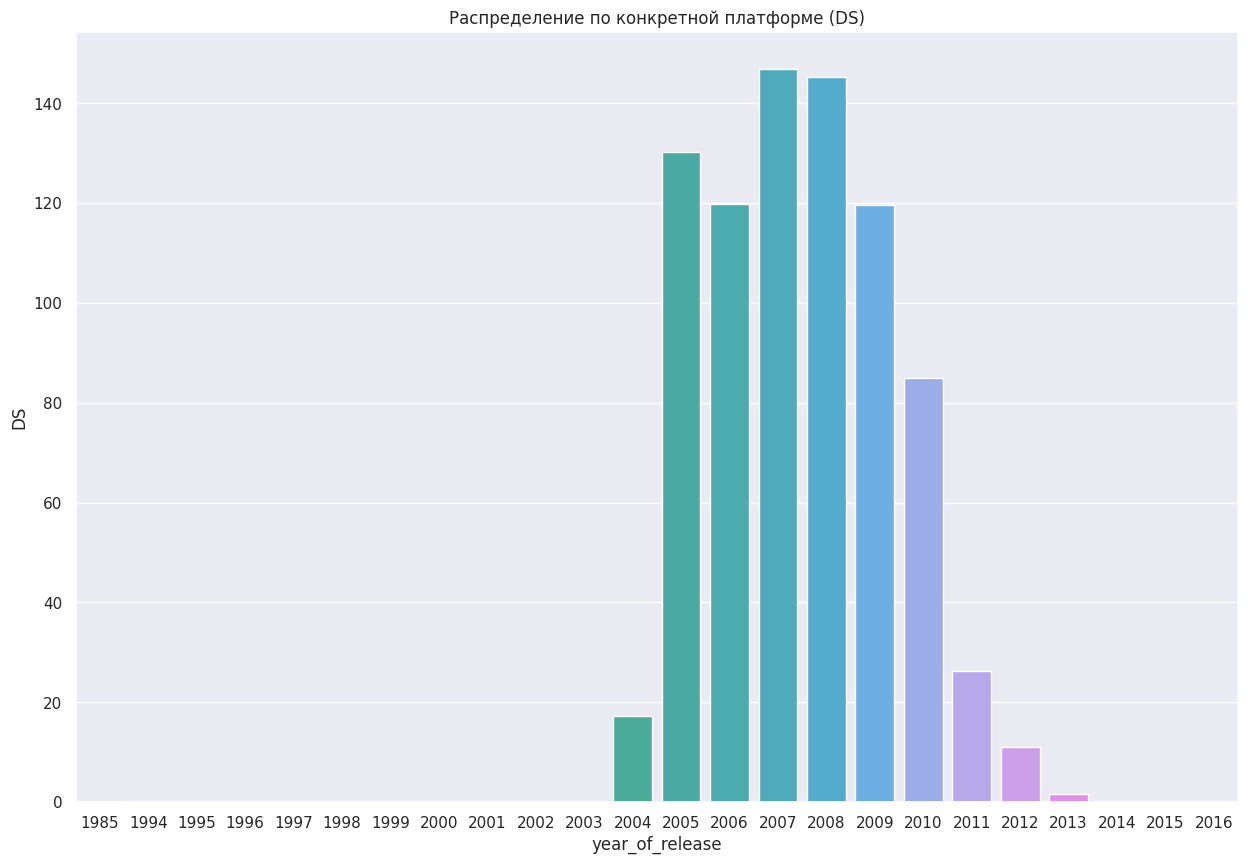

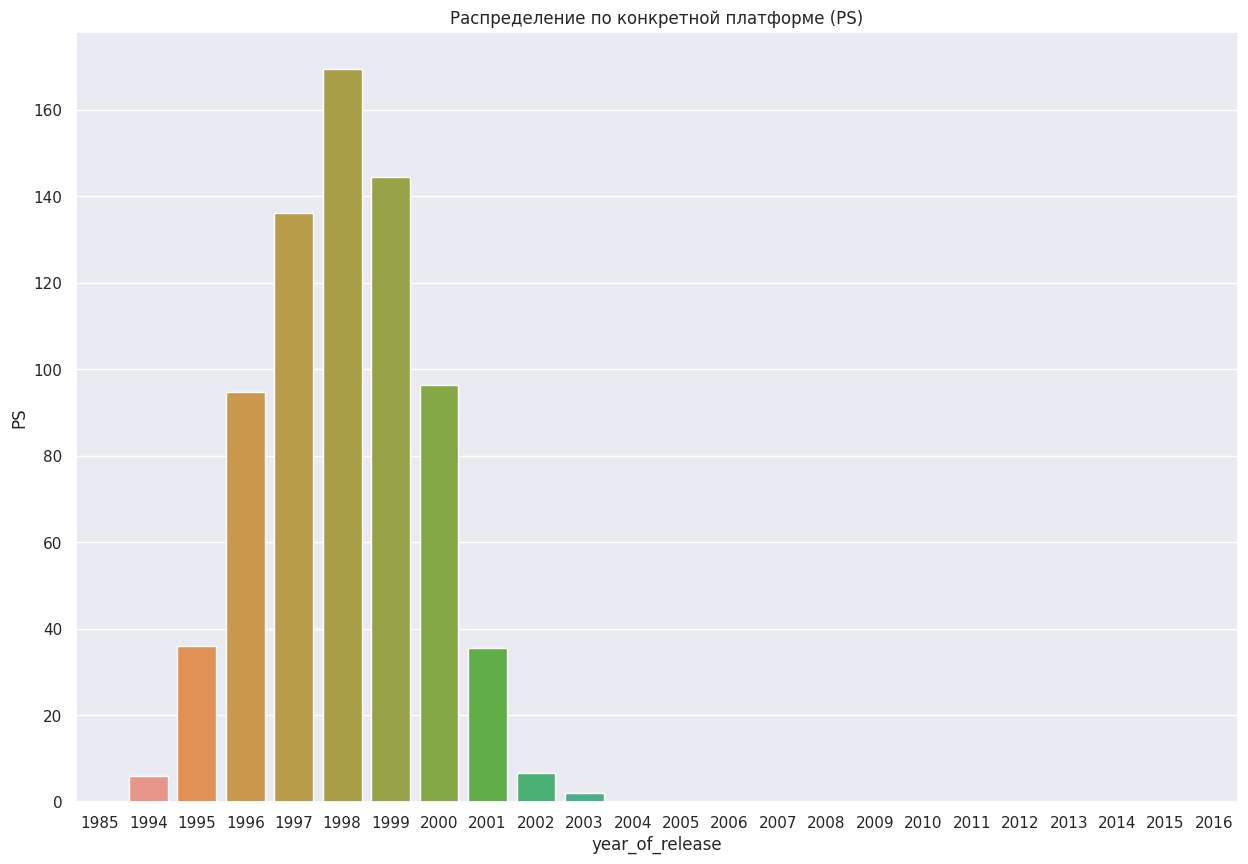

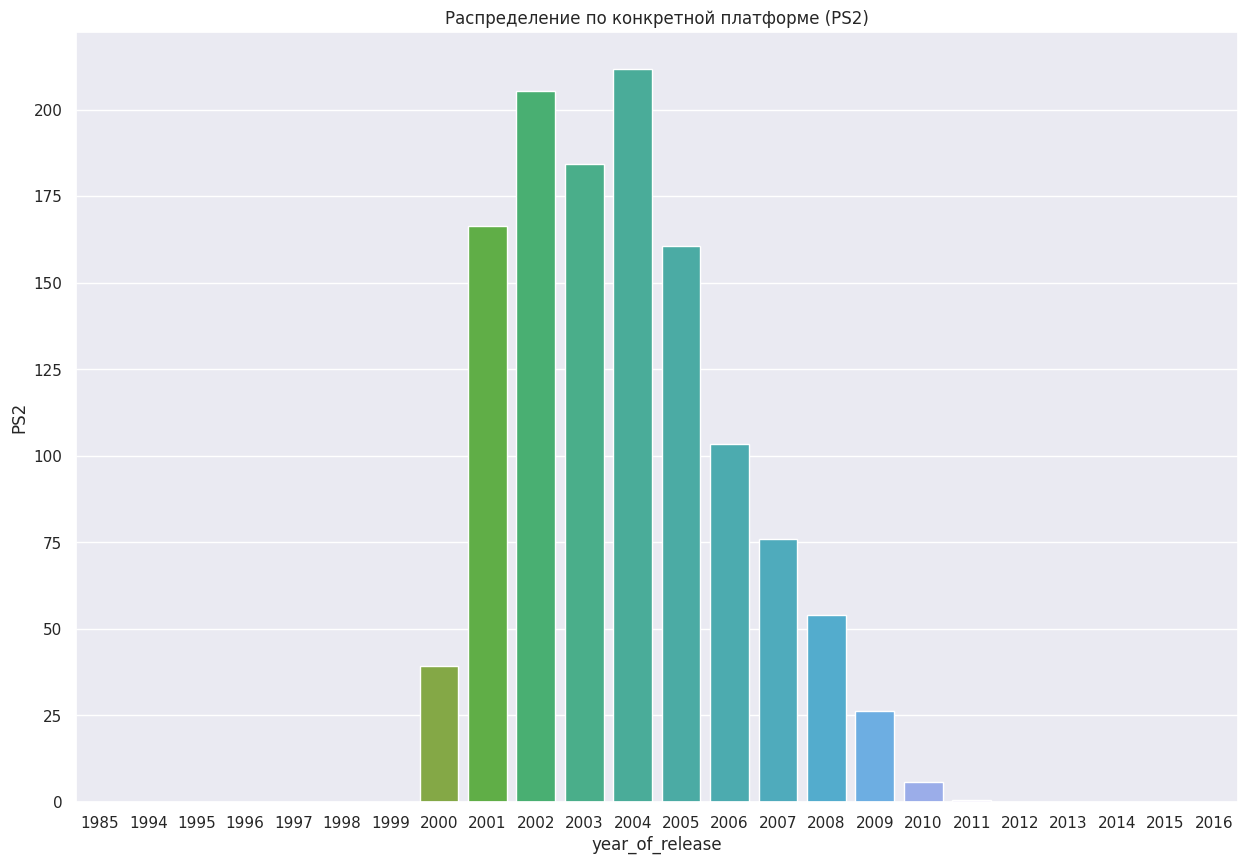

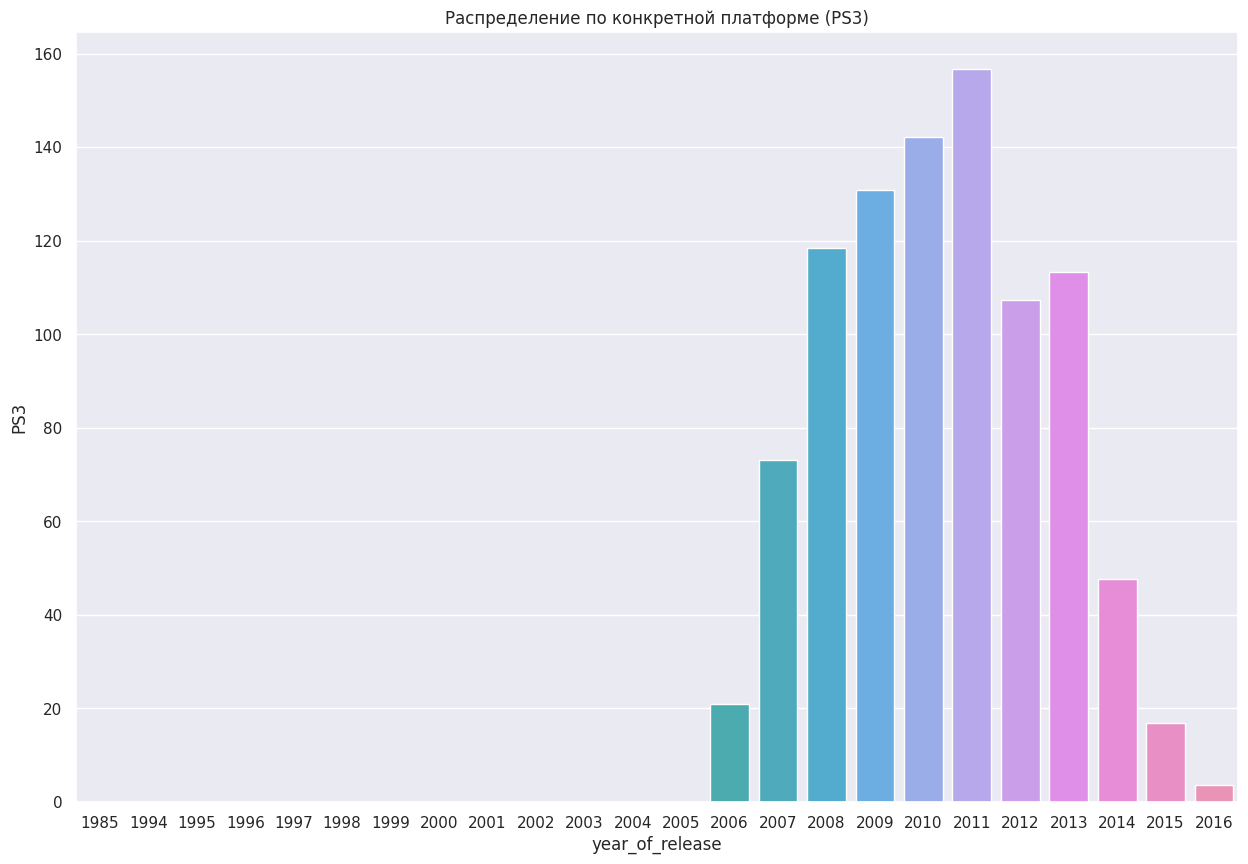

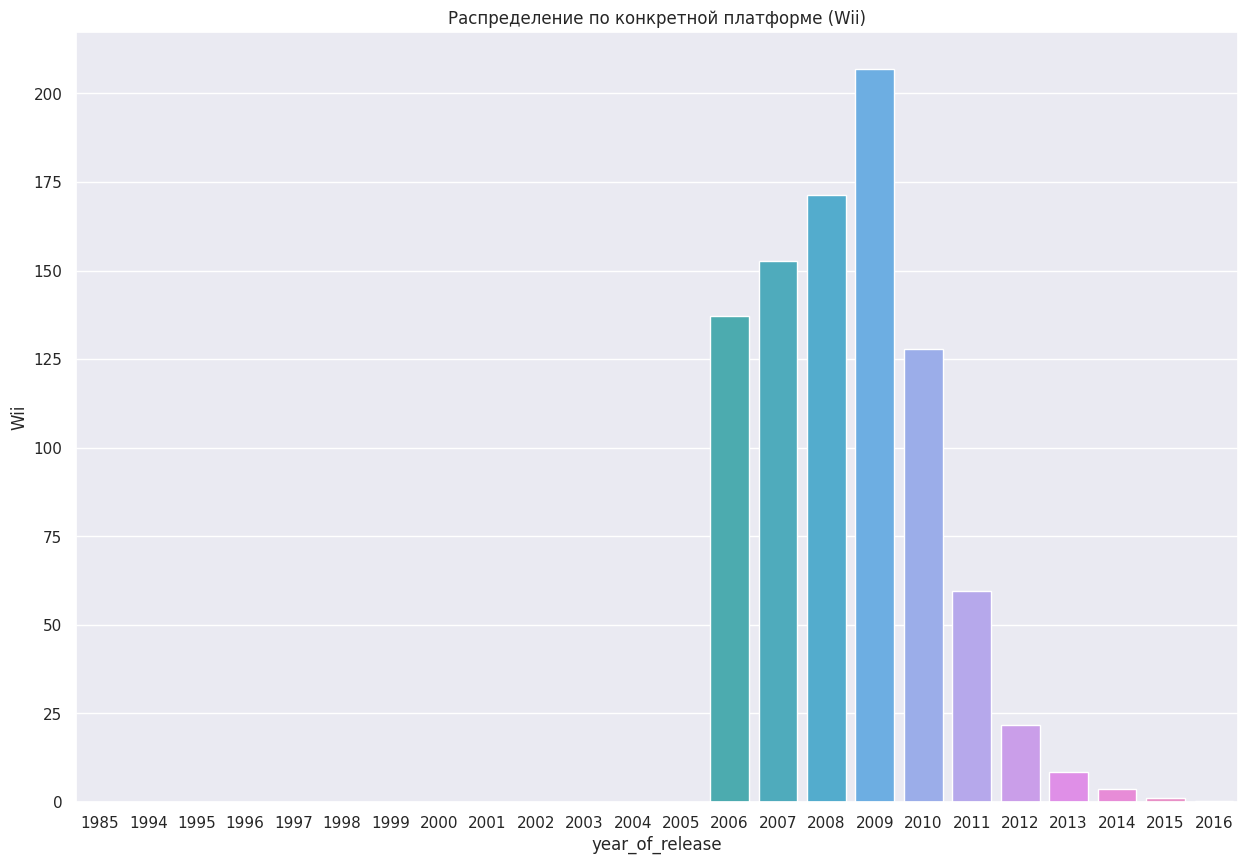

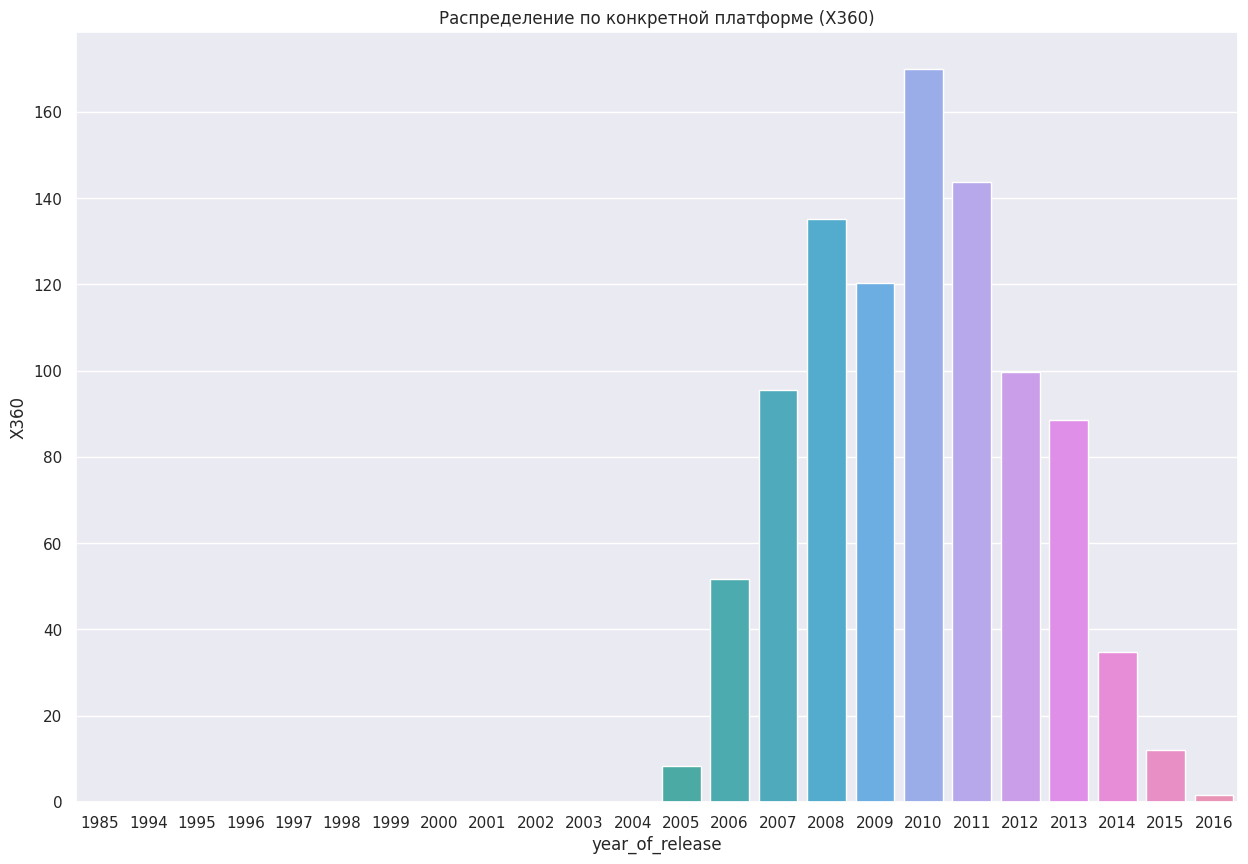

In [93]:
#создадим список нужных для нас приставок
list_platform = list(df_group_platform.columns)[1:]
sns.set(style="darkgrid")

for col in list_platform:
    plt.figure(figsize=(15, 10))
    plt.xlim(1980, 2016)
    sns.barplot(x="year_of_release", y=col, data=df_group_platform)
    plt.title(f'Распределение по конкретной платформе ({col})')
    plt.show()

**Ответ**:

"Жизненный" цикл каждой платформы варьируется от 9 до 11 лет. Пик прибыльности приходится на 4-5 год существования платформы.

Для нас это будет означать, что ставку желательно делать на игры тех платформ, которые появились в 2011 - 2013 годах, но об этом в соответсвующем вопросе.

### в) Выбираем актуальный период, ориентируясь на прогноз продаж в 2017 году.<a id='section0.33'></a>

На основании [вывода](#section0.311) из первого вопроса, определим подходящий для нас период и оставим только нужные нам данные для прогноза.



Для выбора актуального для нас периода (чтобы спрогнозировать 2017) желательно взять с 2014 по 2016 гг. Он не будет сильно отличаться внутри себя, не будут выбиваться значения, по сравнению с самыми прибыльными годами игровой индустрии.

In [94]:
df_actual = df.query('year_of_release >= 2014').reset_index(drop=True)

In [95]:
# оценим получившуюся выборку
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   total_sales      1689 non-null   float64
 9   critic_score     718 non-null    float64
 10  user_score       888 non-null    float64
 11  rating_esrb      940 non-null    object 
dtypes: float64(7), int32(1), object(4)
memory usage: 151.9+ KB


**Ответ**:

Выбрав период с 2014 по 2016, мы уменьшили таблицу до 1689 строк.

### г) Лидеры продаж среди платформ. Стадия развития, падения, потенциального роста.<a id='section0.34'></a>

На основании [графиков](#section0.321) из второго вопроса, определим платформы лидеры, "умирающие" платформы и потенциально прибыльные платформы.

Как мы уже определили ранее, платформы приносят прибыль от 9 до 11 лет, а пик прибыльности приходится на середину этого срока.

Сгруппируем данные платформам и посмотрим на год первого упоминания игр для каждой из платформ:


In [96]:
df.groupby('platform')['year_of_release'].min().sort_values(ascending=False)

platform
XOne    2013
PS4     2013
WiiU    2012
3DS     2011
PSV     2011
PS3     2006
Wii     2006
X360    2005
PSP     2004
GC      2001
GBA     2000
PS2     2000
XB      2000
WS      1999
DC      1998
PCFX    1996
N64     1996
TG16    1995
SAT     1994
PS      1994
3DO     1994
SCD     1993
NG      1993
GG      1992
SNES    1990
GEN     1990
GB      1988
PC      1985
DS      1985
NES     1983
2600    1980
Name: year_of_release, dtype: int32

Для прогноза продаж прибыли на 2017 год нас уже однозначно не будут интересовать игры для платформ, выпущенных ранее 2007 года. Сюда будут отнесены все платформы прошлого века, предыдущие поколения PlayStation(PS3, PS2), предыдущие поколения XBOX(X360, XB), Wii, портативные консоли GameBoy Advance и Playstation Sony Portable.

**Важное замечание**:

Описанная выше логика выбора подходит для всех консолей. Однако, игры на компьютер("PC") продолжают выходить, хоть и приносят меньше, чем консольные игры: 

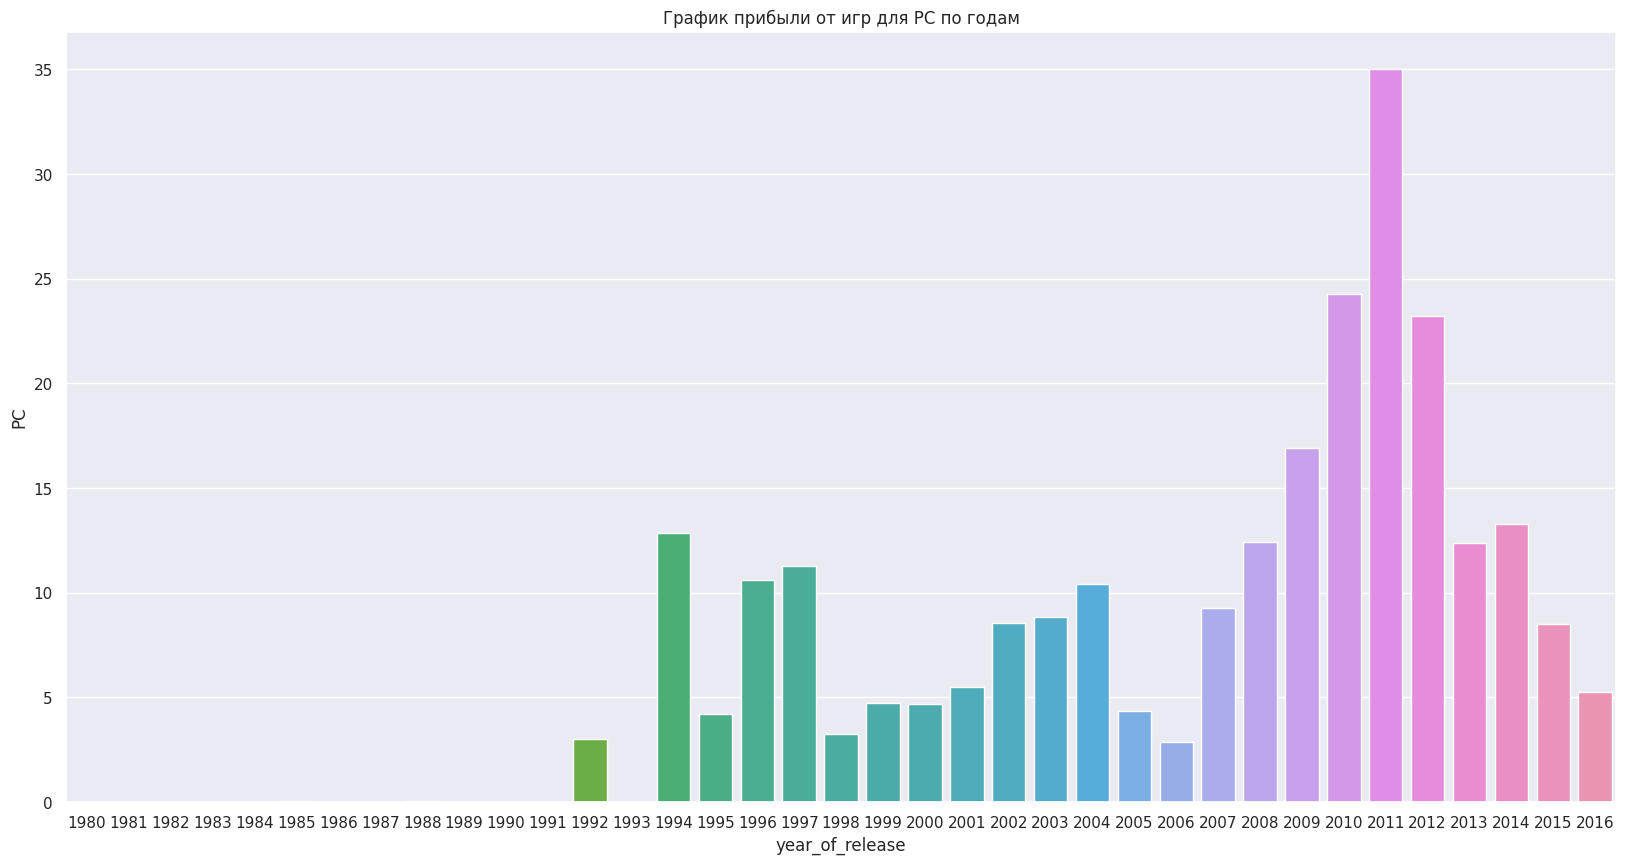

In [97]:
#посмотрим, какую прибыль приносили игры для компьютера
df_group_platform_pc = df.pivot_table(index=['year_of_release'], 
                                                  values=['total_sales'], 
                                                  columns='platform', 
                                                  aggfunc={'total_sales':'sum'})

df_group_platform_pc.columns = df_group_platform_pc.columns.droplevel([0])
df_group_platform_pc = df_group_platform_pc['PC'].reset_index()

plt.figure(figsize=(20, 10))
plt.xlim(1980, 2016)
sns.set(style="darkgrid")
sns.barplot(x="year_of_release", y='PC', data=df_group_platform_pc)
plt.title('График прибыли от игр для PC по годам')
plt.show()

In [98]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Видно, что категория 'PC' приносит меньше прибыли, однако, игры на компьютер продолжают выпускать, что нельзя сказать про "умершие" игровые консоли.

 **Ответ**:

На **стадии пика** (и в то же время потенциального роста) в 2016 году находятся такие платформы как `"Sony Playstation 4"` и `"XBox One"`. Также не стоит забывать про компьютерные игры, которые, хоть и находятся на стадии падения, обладают другой логикой развития, в отличие от консолей.

На **стадии падения** находятся портативные приставки Nintendo 3DS, PlayStation Vita.

### д) Строим и анализируем box-plot по продажам, разбив данные по платформам.<a id='section0.35'></a>

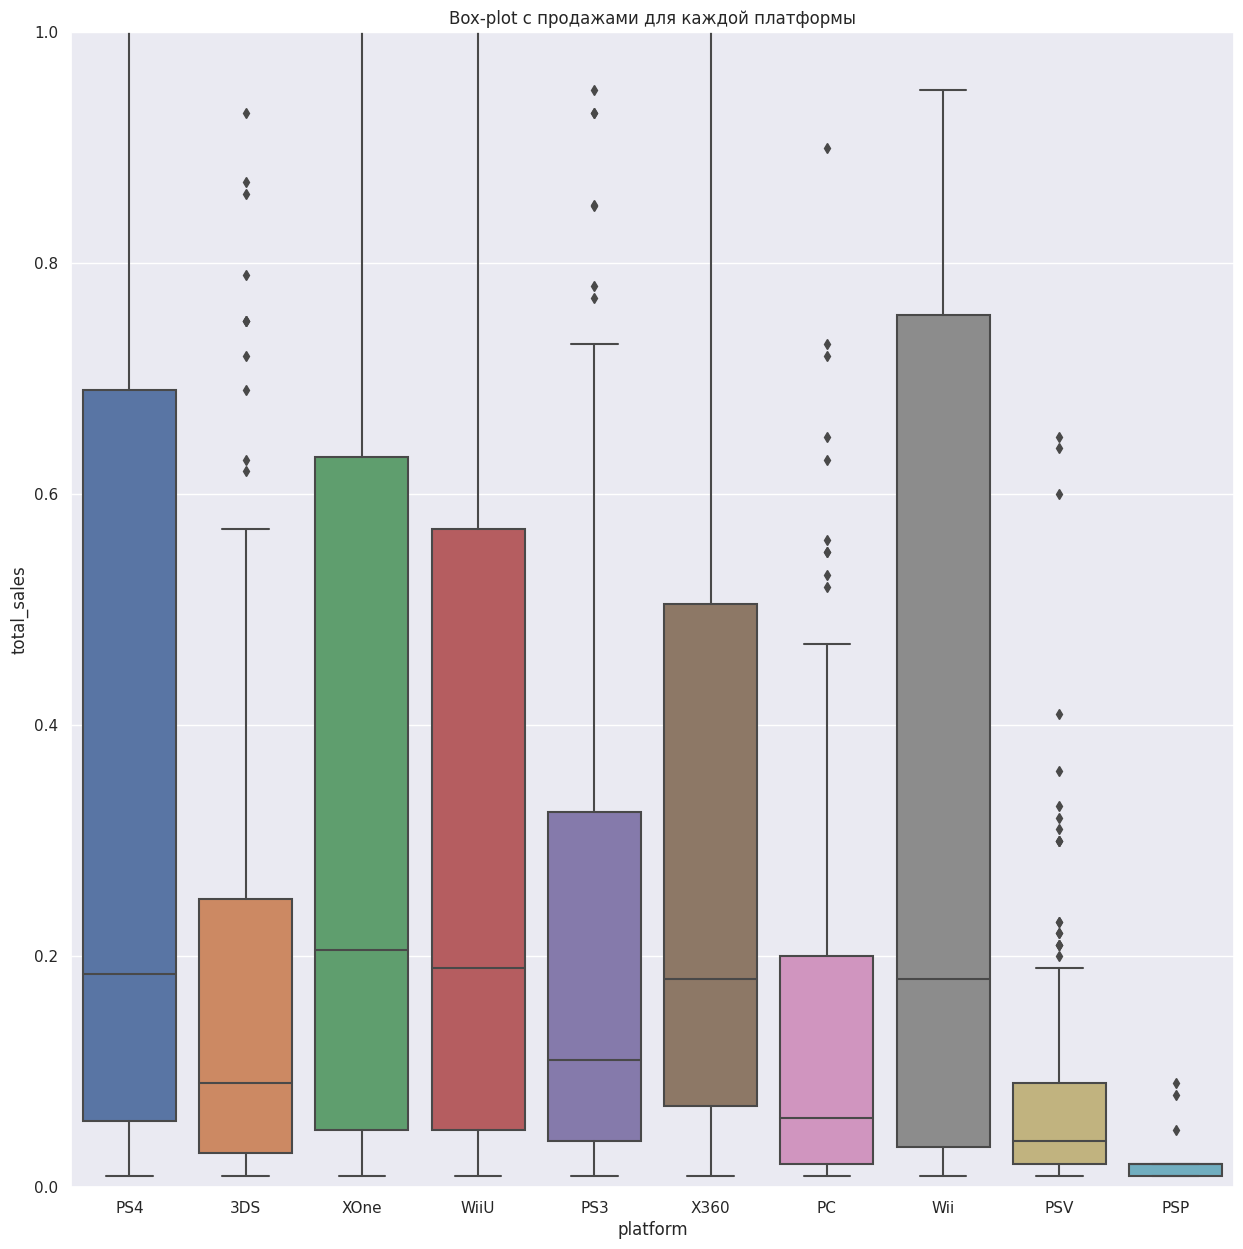

In [99]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 15))
plt.ylim(0, 1)
df_for_boxplot = df_actual

ax = sns.boxplot(x='platform', y='total_sales', data=df_for_boxplot)
 
plt.title('Box-plot с продажами для каждой платформы')
plt.show()

**Ответ**:

Построенный нами box-plot также помогает определиться с платформами, на которые нам надо ориентироваться в прогнозировании продаж на следующий год. При этом надо держать во внимании ранее полученные выводы ("жизненный" цикл консолей). Что можно сказать:

* 75% от всех выпущенных игр на PS 4 были проданы в размере чуть меньше 700000 копий. После нее по популярности игр находится XBox One. Не будем забывать, что последние две платформы находятся **на пиковой стадии**, что важно для нашего прогноза.


* Игры для Wii хоть и продавались в большем количестве копий, но на данный момент популярность приставки очень низкая.


* среди портативных приставок место лидера уверенно закрепленно за WiiU. А второе место занимает Nintendo 3DS.

### е) Оценка влияния отзывов на продажи на различных платформах.<a id='section0.36'></a>

Для данной оценки возьмем одну из популярных игровых платформ, XBox 360:

In [100]:
# отберем игры только для X360 и запишем в переменную
feedback = df_actual.query('platform == "X360"')

Сначала оценим влияние оценки критиков на общие продажи:

In [101]:
# вычислим коэффициент корреляции
feedback['critic_score'].corr(feedback['total_sales'])

0.5257228356581523

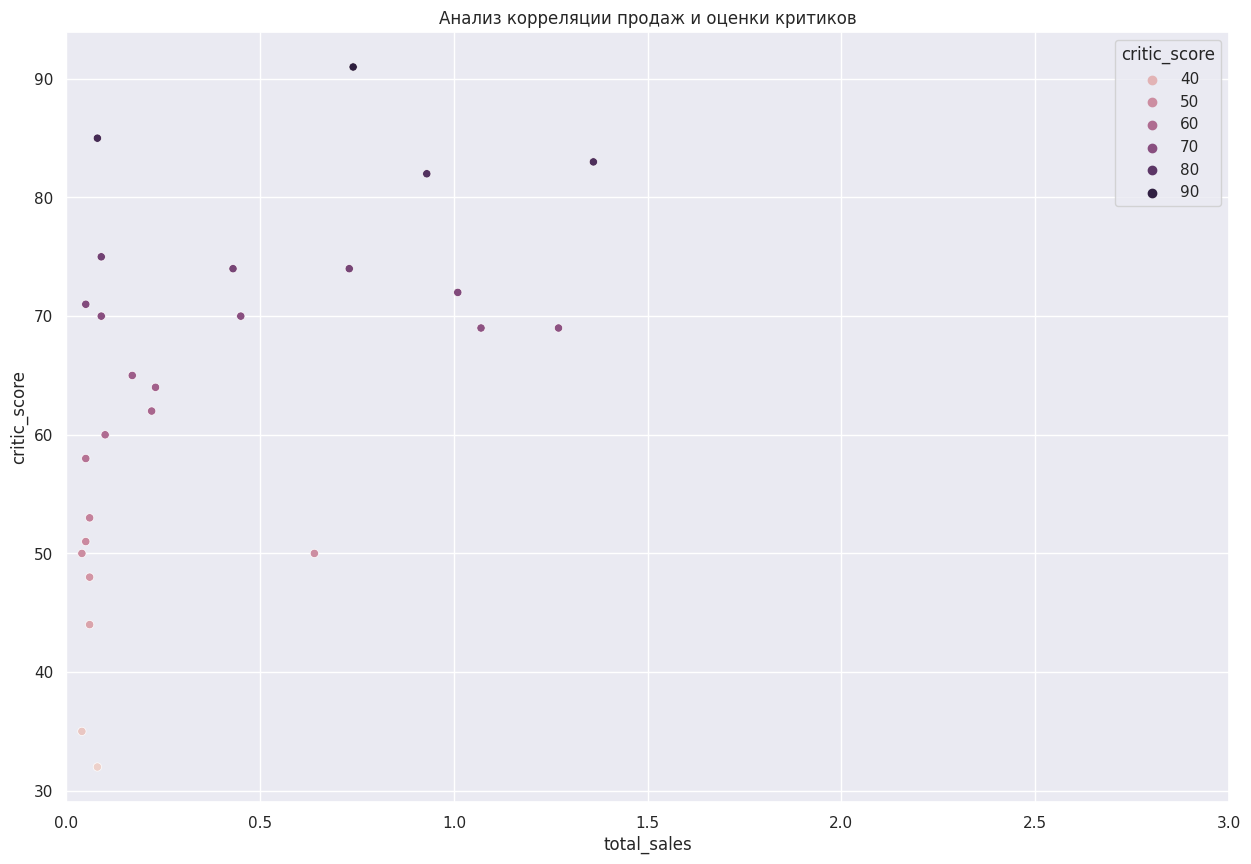

In [102]:
# построим диаграмму рассеяния
plt.figure(figsize=(15, 10))
plt.xlim(0, 3) 
plt.title('Анализ корреляции продаж и оценки критиков')
sns.scatterplot(data=feedback, x="total_sales", y="critic_score", hue="critic_score");

Проделаем то же самое с отзывами пользователей, после опишем вывод:

In [103]:
# вычислим коэффициент корреляции
feedback['user_score'].corr(feedback['total_sales'])

-0.138444570945665

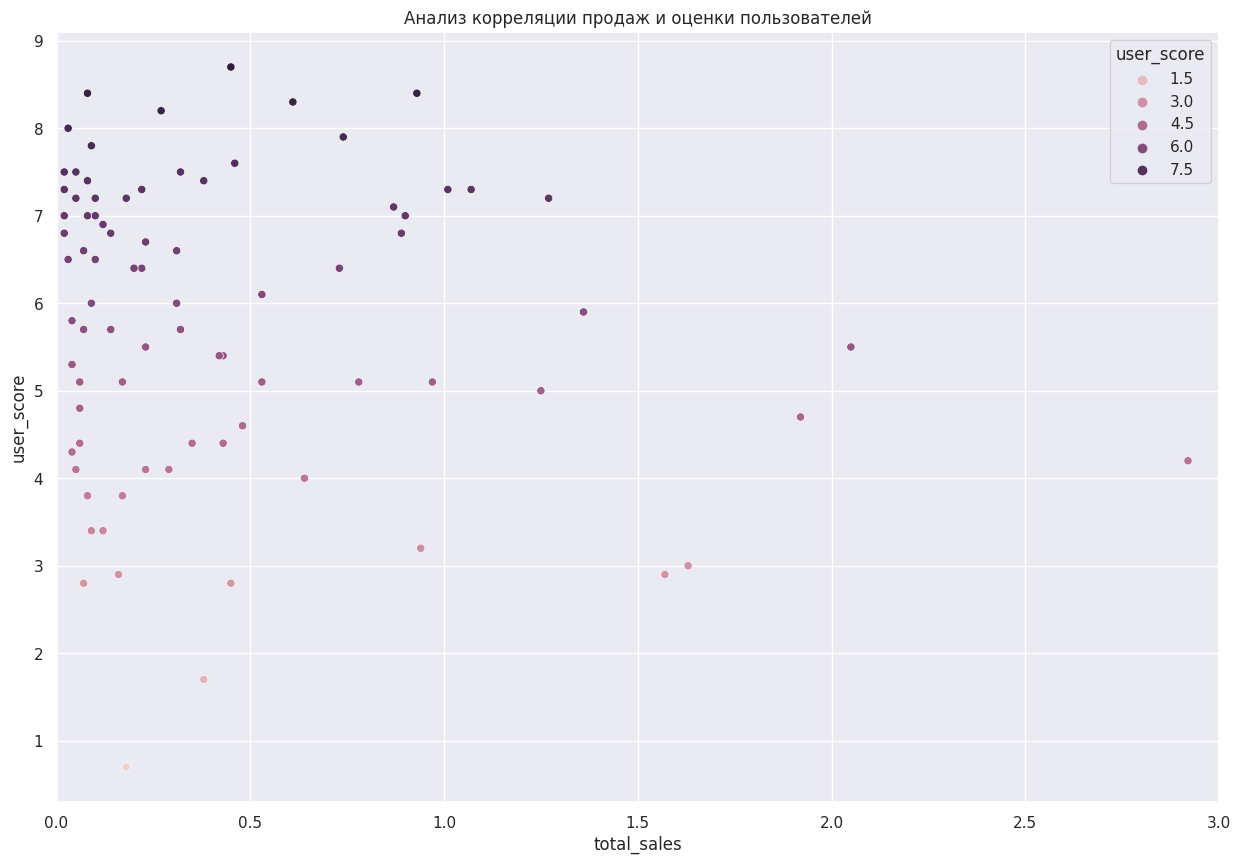

In [104]:
plt.figure(figsize=(15, 10))
plt.xlim(0, 3) 
plt.title('Анализ корреляции продаж и оценки пользователей')
sns.scatterplot(data=feedback, x="total_sales", y="user_score", hue="user_score");

**Ответ**:


**Влияние оценки пользователей:**

- коэффициент корреляции равен -0.14. Что очень мало. На графике можно проследить легкую нелинейную зависимость, а если быть точнее, выделить порог в виде оценки, после которого продажи растут - оценка 4 из 10.
    

**Влияние оценки критиков:**

- коэффициент корреляции равен 0.53. Что говорит о положительной линейной зависимости. Это лучше чем с оценками пользователей. На графике можно выделить порог в виде оценки, после которого продажи растут - оценка 60 из 100.

Посмотрим, как это работает для других платформ:

In [105]:
# пройдемся циклом по интересующим нас данным
for elem in list(df_actual['platform'].unique()):
    feedback = df.loc[df['platform'] == elem, :]
    print(elem + ':')
    critic = feedback['critic_score'].corr(feedback['total_sales'])
    user = feedback['user_score'].corr(feedback['total_sales'])
    print('Корреляция оценки критиков:', critic)
    print('Корреляция оценки игроков:', user, '\n')

PS4:
Корреляция оценки критиков: 0.40656790206178095
Корреляция оценки игроков: -0.031957110204556424 

3DS:
Корреляция оценки критиков: 0.3487397305984834
Корреляция оценки игроков: 0.22207843643390882 

XOne:
Корреляция оценки критиков: 0.4169983280084017
Корреляция оценки игроков: -0.06892505328279414 

WiiU:
Корреляция оценки критиков: 0.34837976012017485
Корреляция оценки игроков: 0.4002190202148617 

PS3:
Корреляция оценки критиков: 0.4327589578997135
Корреляция оценки игроков: 0.12841562938563028 

X360:
Корреляция оценки критиков: 0.39286589254006965
Корреляция оценки игроков: 0.11418661214018044 

PC:
Корреляция оценки критиков: 0.2573947184009851
Корреляция оценки игроков: 0.012904741611451193 

Wii:
Корреляция оценки критиков: 0.1779072857759491
Корреляция оценки игроков: 0.11283121360773772 

PSV:
Корреляция оценки критиков: 0.13176292727608935
Корреляция оценки игроков: 0.0134887568358865 

PSP:
Корреляция оценки критиков: 0.31752451005134863
Корреляция оценки игроков: 0.2

В общем коэффициенты корреляции оценки критиков и продаж не сильно отличаются. Исключения составляют игры, по которым не так много данных: PSV, WiiU.

При этом вывод об отсутствии линейной взаимосвязи подтверждается - в среднем коэффициент **ниже 50 %**. 
Однако оценка критиков связана с продажами лучше, чем оценка пользователей.

### ж) Самые прибыльные жанры, различия прибыльных и не очень жанров.<a id='section0.37'></a>

Для начала посмотрим, как в общем распределены игры по жанрам в нашей таблице:

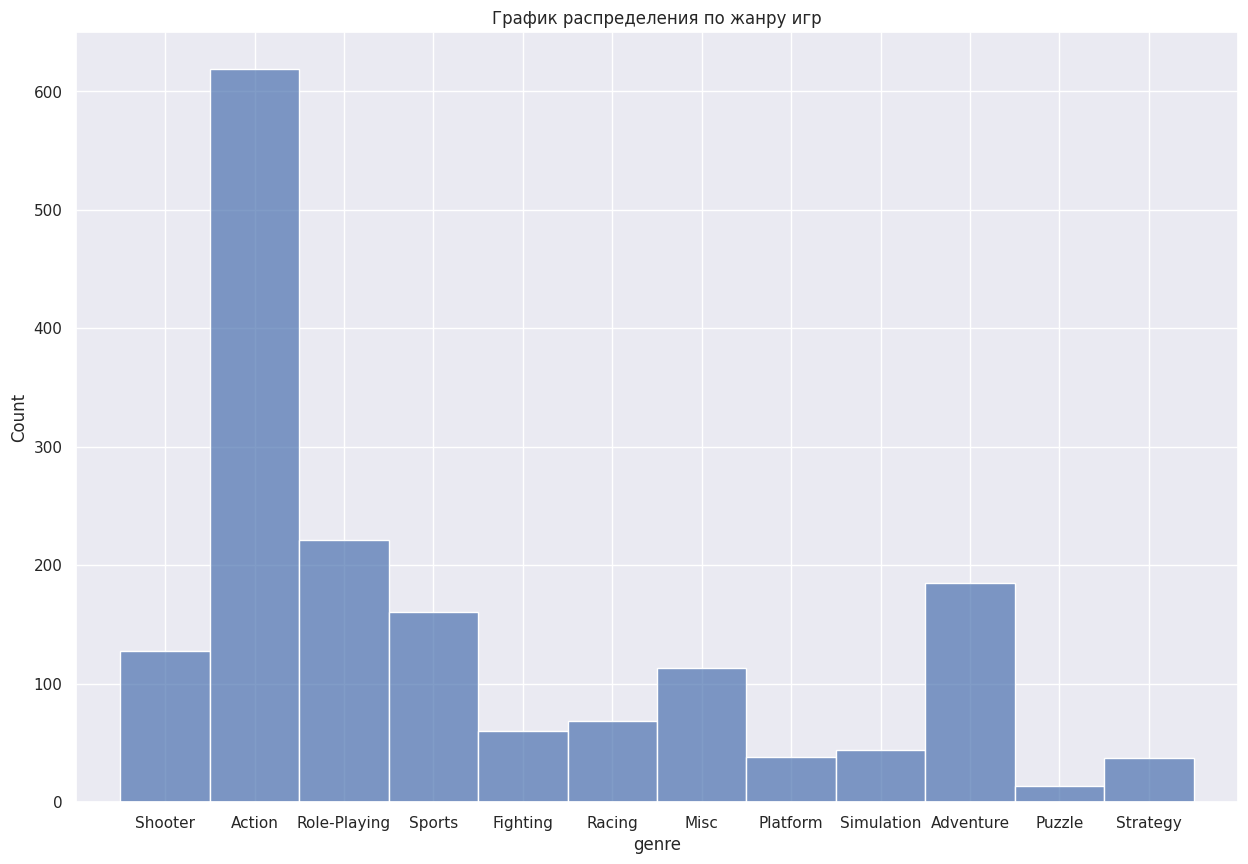

In [106]:
# построим диаграмму выхода игр по годам
plt.figure(figsize=(15, 10))
plt.xlim(-1, 12) 
plt.title('График распределения по жанру игр')
sns.histplot(df_actual['genre'], alpha=0.7, bins=12);

Как можно заметить, самый выпускаемый жанр **Action**, на втором месте **RPG**. На третьем месте **Adventure** и **Sports**.

Отмечу, что мы анализируем данные по ранее выбранному актуальному периоду. По всей таблице данные будут отличаться, но во всей таблице данные более чем за 30 лет, а нас интересует прогноз на будущее. Поэтому анализируем данные за ближайшее к прогнозируемому периоду время.

Далее посмотрим на распределение прибыли в жанрах:

In [107]:
# создаем сводную таблицу по жанрам
df_actual_pivot_genre = df_actual.pivot_table(index=['genre'], 
                                                  values=['total_sales'], 
                                                  aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()

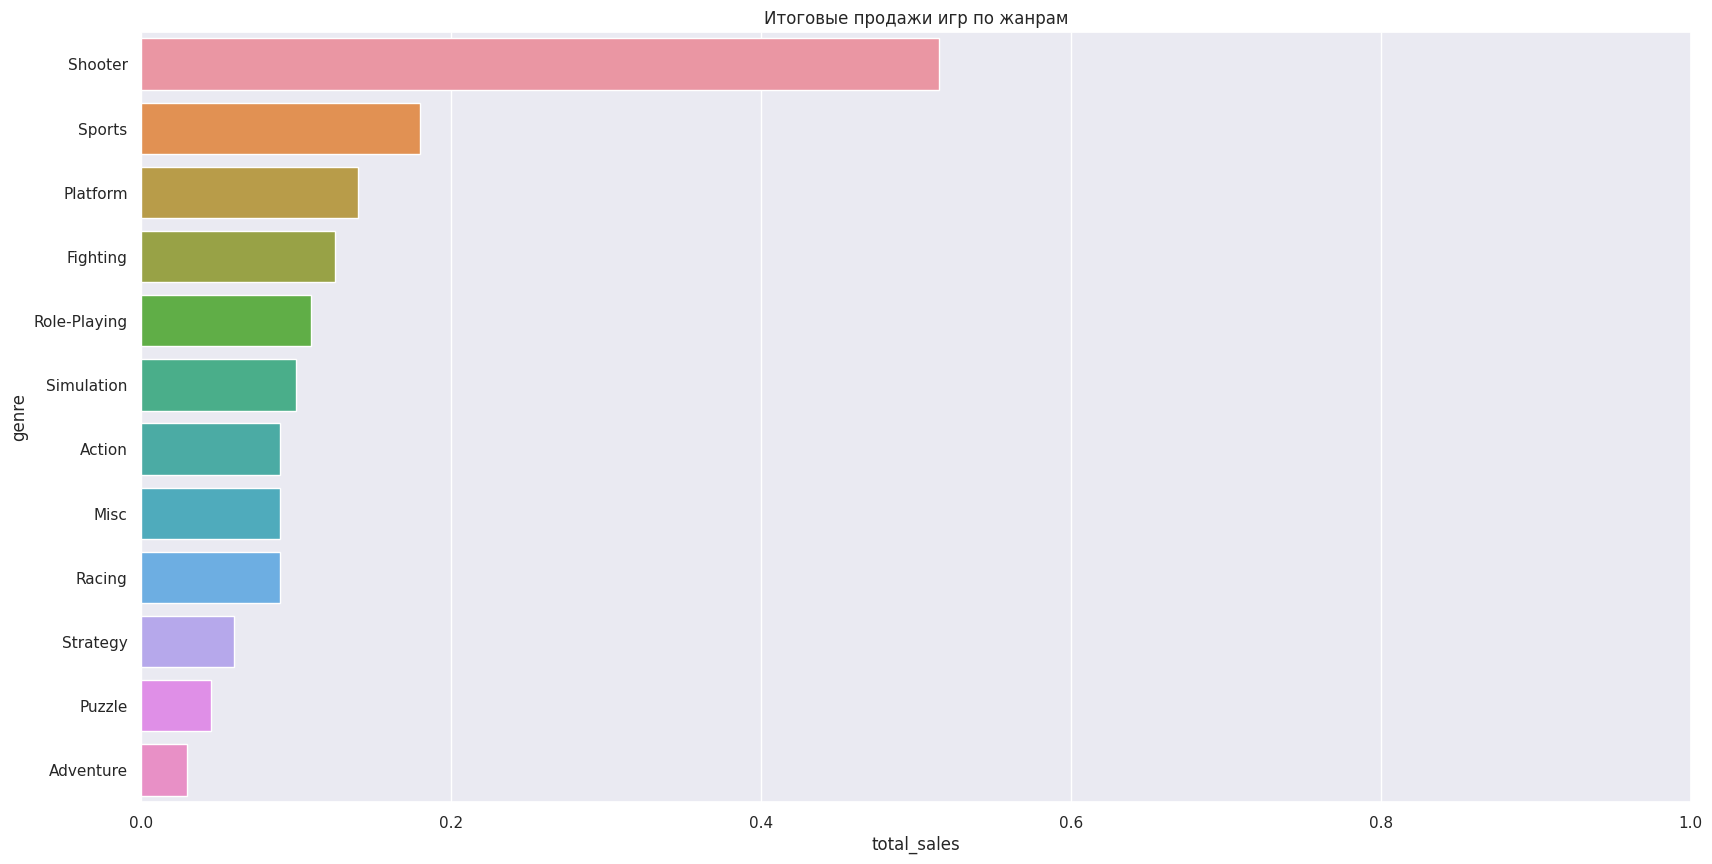

In [108]:
plt.figure(figsize=(20, 10))
plt.xlim(0, 1)
sns.set(style="darkgrid")
plt.title('Итоговые продажи игр по жанрам')
sns.barplot(x="total_sales", y='genre', data=df_actual_pivot_genre)
plt.show()

**Ответ**:

Жанр **Shooter** по продажам занимает первое место, на втором месте жанр **Sports**. Далее платформеры и файтинги.

Самые слабые - **Puzzle**, **Adventure**.

### **Промежуточный вывод**:

На данном этапе мы провели исследовательский анализ данных и сделали следующие важные выводы/действия:

* Изучили как развивалась индустрия видеоигр, определили пик развития индустрии;


* Узнали, как долго консоль пользуется популярностью;


* Выделили для дальнейшей работы актуальный период (напомню, это 2014 - 2016 гг.);


* Определили потенциально прибыльные платформы на ближайшее будущее;


* Посмотрели, какие платформы лидируют по продажам своих игр;


* Попробовали найти взаимосвязь оценок пользователей и критиков и продаж игр;


* Выделили самые прибыльные жанры.

**Резюмируя, можно сказать следующее**:

Для выбора потенциально успешных игр для 2017 года желательно обратить внимание на игры для таких платформ, как `Sony Playstation 4` и `XBox One`, уделить внимание оценкам критиков, выбирать преимущественно экшн-игры, шутеры, RPG, спортивные симуляторы.

## 4. Портрет пользователя каждого региона <a id='section0.4'></a>

[Обратно к содержанию](#section0.100)

**Пользователи Северной Америки**:

* топ-5 популярных платформ:

In [109]:
# сгруппируем данные по платформам
na_platform = df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()

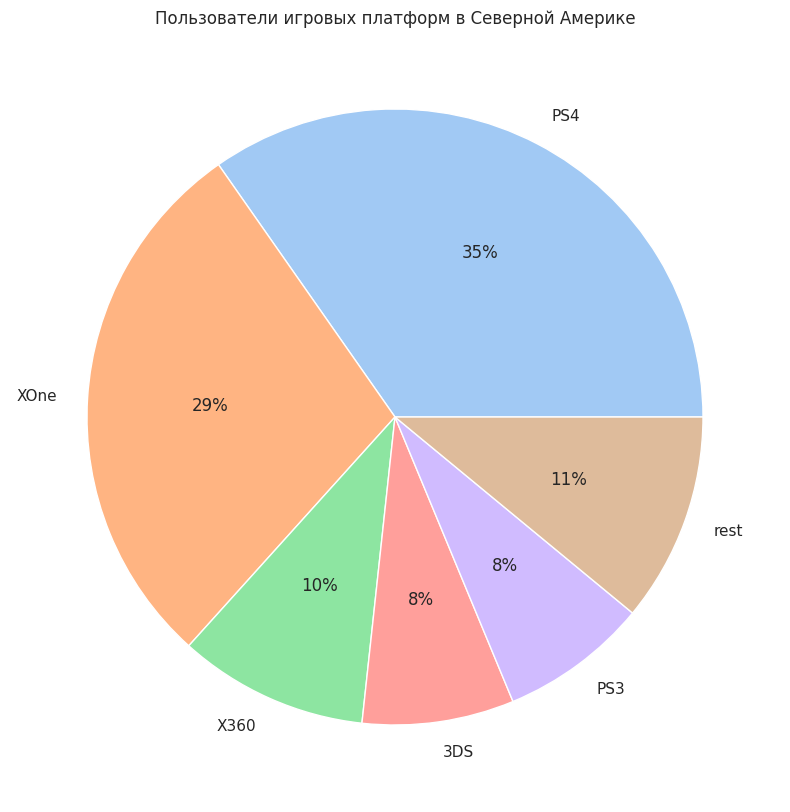

In [110]:
# посмотрим на круговой диаграмме доли по платформам
top_5 = list(na_platform['na_sales'][:5])
top_5.append(sum(list(na_platform['na_sales'][5:])))
labels_top_5 = list(na_platform['platform'][:5])
labels_top_5.append('rest')

plt.rcParams["figure.figsize"] = (20,10)
colors = sns.color_palette('pastel')[ 0:6 ]

plt.pie(top_5, labels = labels_top_5, colors = colors, autopct='%.0f%%')
plt.title('Пользователи игровых платформ в Северной Америке')
plt.show()

35% процентов пользователей Северной Америки предпочитают PS 4, второе место достается XBox One. Далее идут приставки предыдущего поколения (PS3 и XBox360), а закрывает топ-5 портативные консоли Nintendo 3DS и WiiU.

* топ-5 жанров:

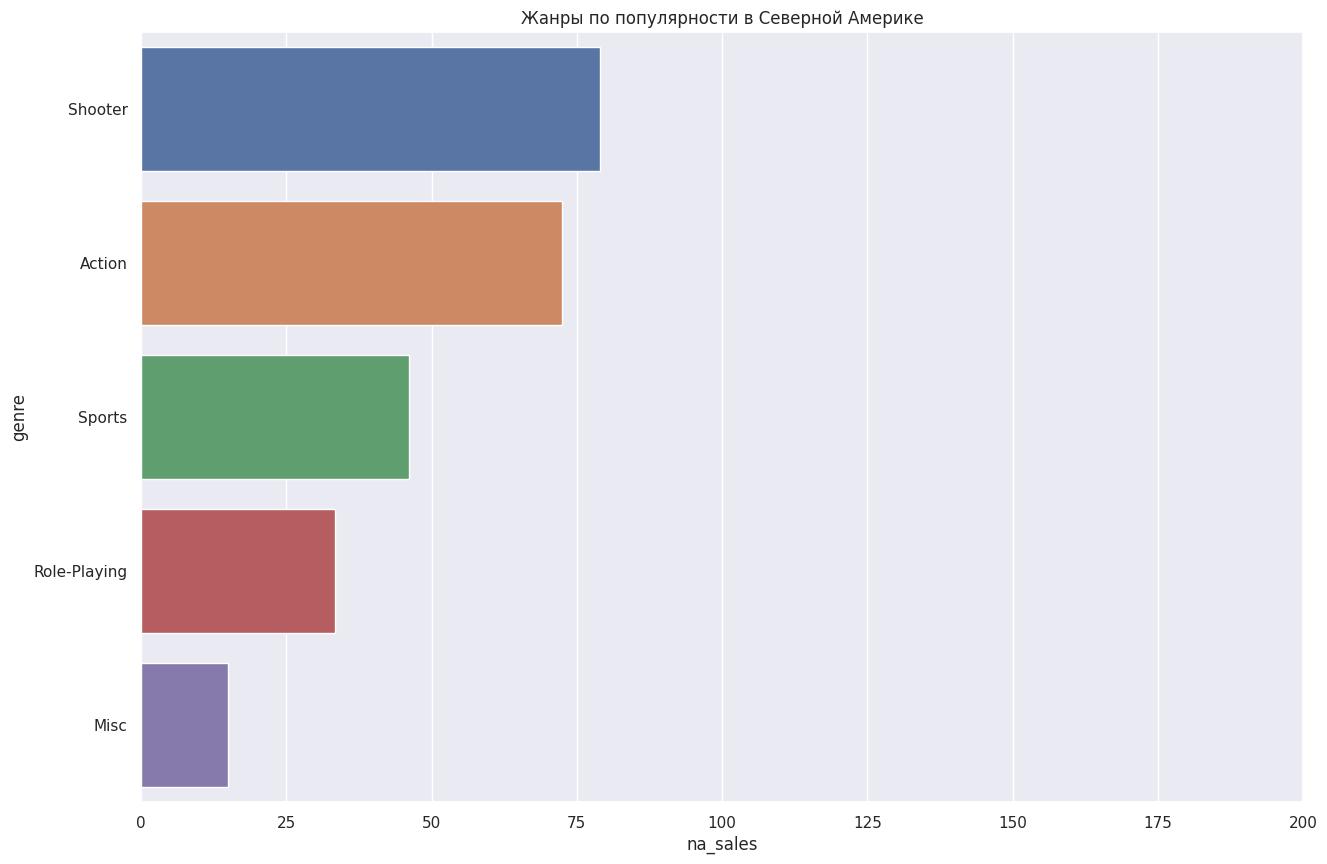

In [111]:
# сгруппируем данные по жанрам
na_genre = df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(15, 10))
plt.xlim(0, 200)
sns.set(style="darkgrid")
sns.barplot(x=na_genre["na_sales"][:5], y=na_genre['genre'][:5], data=na_genre)
plt.title('Жанры по популярности в Северной Америке')
plt.show()

Чуть более 75 млн. копий игр продается в жанре Shooter, чуть меньше - в жанре Action.

Далее идут жанры значительно слабее по продажам: спортивные симуляторы, RPG и собирательный жанр Misc (достаточно общая группа).

* влияние рейтинга ESRB на продажи:

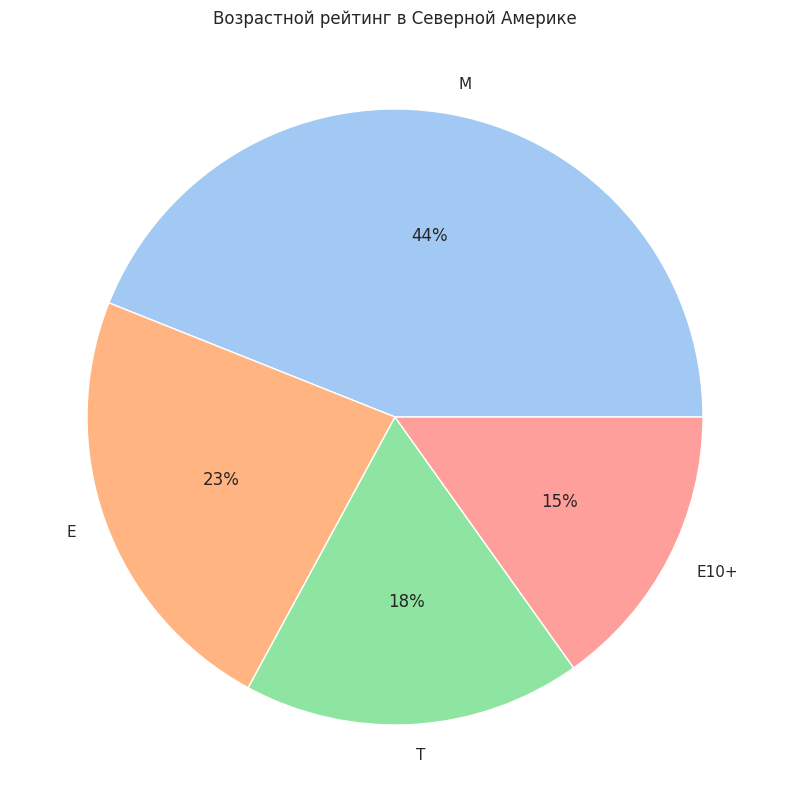

In [112]:
# сгруппируем данные по рейтингу
na_esrb = df_actual.groupby('rating_esrb')['na_sales'].sum().sort_values(ascending=False).reset_index()

# посмотрим на круговой диаграмме доли по платформам

plt.rcParams["figure.figsize"] = (20,10)
colors = sns.color_palette('pastel')[ 0:5 ]

plt.pie(na_esrb['na_sales'], labels = na_esrb['rating_esrb'], colors = colors, autopct='%.0f%%')
plt.title('Возрастной рейтинг в Северной Америке')
plt.show()

В Северной Америке 44 % занимают игры с рейтингом "Mature" - для лиц старше 17 лет.

Второе место относится к рейтингу "EveryOne" - для всех возрастов.


**Пользователи из Европы**:

* топ-5 популярных платформ:

In [113]:
# сгруппируем данные по платформам
eu_platform = df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()

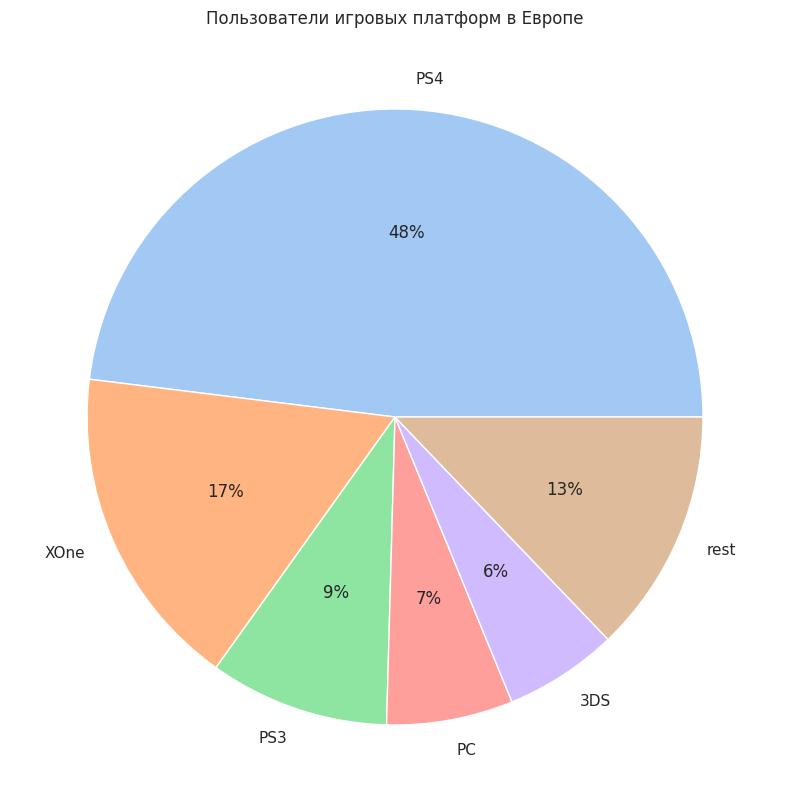

In [114]:
# посмотрим на круговой диаграмме доли по платформам
top_5 = list(eu_platform['eu_sales'][:5])
top_5.append(sum(list(eu_platform['eu_sales'][5:])))
labels_top_5 = list(eu_platform['platform'][:5])
labels_top_5.append('rest')


plt.rcParams["figure.figsize"] = (20,10)
colors = sns.color_palette('pastel')[ 0:6 ]
plt.title('Пользователи игровых платформ в Европе')
plt.pie(top_5, labels = labels_top_5, colors = colors, autopct='%.0f%%')
plt.show()

В европейских странах имеется явный лидер среди консолей - PS4. Далее с большим отрывом идет XBox One, предыдущее поколение Sony, и компьютеры, как платформа для видеоигр.

* топ-5 жанров:

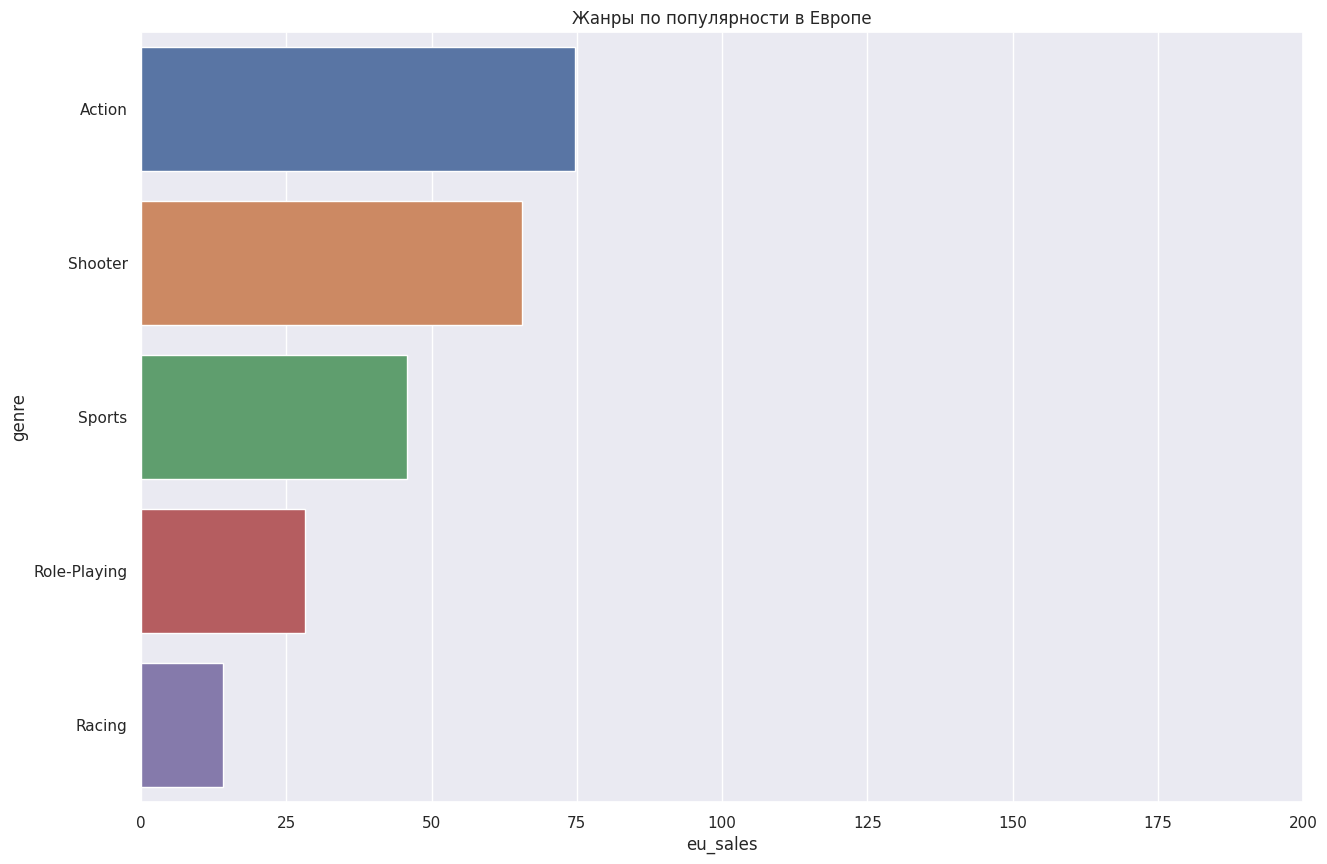

In [115]:
# сгруппируем данные по жанрам
eu_genre = df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(15, 10))
plt.xlim(0, 200)
sns.set(style="darkgrid")
plt.title('Жанры по популярности в Европе')
sns.barplot(x=eu_genre["eu_sales"][:5], y=eu_genre['genre'][:5], data=eu_genre)
plt.show()

Чуть менее 75 млн. копий игр продается в жанре Action, далее с небольшим отрывом - в жанре Shooter.

После идут спортивные симуляторы, RPG и Гонки.

* влияние рейтинга ESRB на продажи:

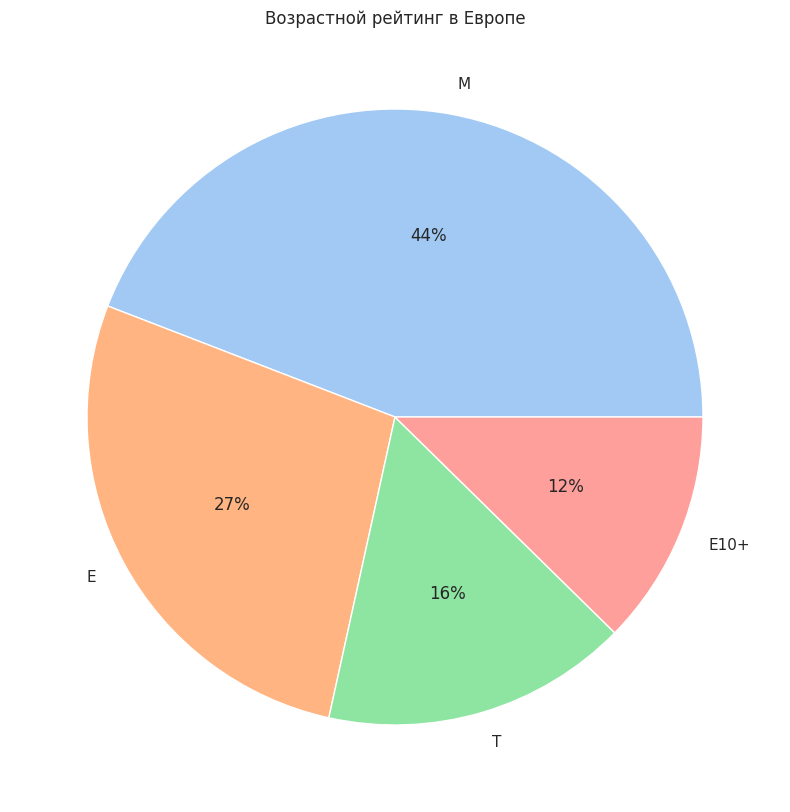

In [116]:
# сгруппируем данные по рейтингу
eu_esrb = df_actual.groupby('rating_esrb')['eu_sales'].sum().sort_values(ascending=False).reset_index()

# посмотрим на круговой диаграмме доли по платформам
plt.rcParams["figure.figsize"] = (20,10)
colors = sns.color_palette('pastel')[ 0:5 ]
plt.title('Возрастной рейтинг в Европе')
plt.pie(eu_esrb['eu_sales'], labels = eu_esrb['rating_esrb'], colors = colors, autopct='%.0f%%')
plt.show()

В Европе как и в Америке 44 % занимают игры с рейтингом "Mature" - для лиц старше 17 лет.

Второе место относится к рейтингу "EveryOne" - для всех возрастов. Но их доля чуть больше, чем в Америке.


**Пользователи Японии**:

* топ-5 популярных платформ:

In [117]:
# сгруппируем данные по платформам
jp_platform = df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()

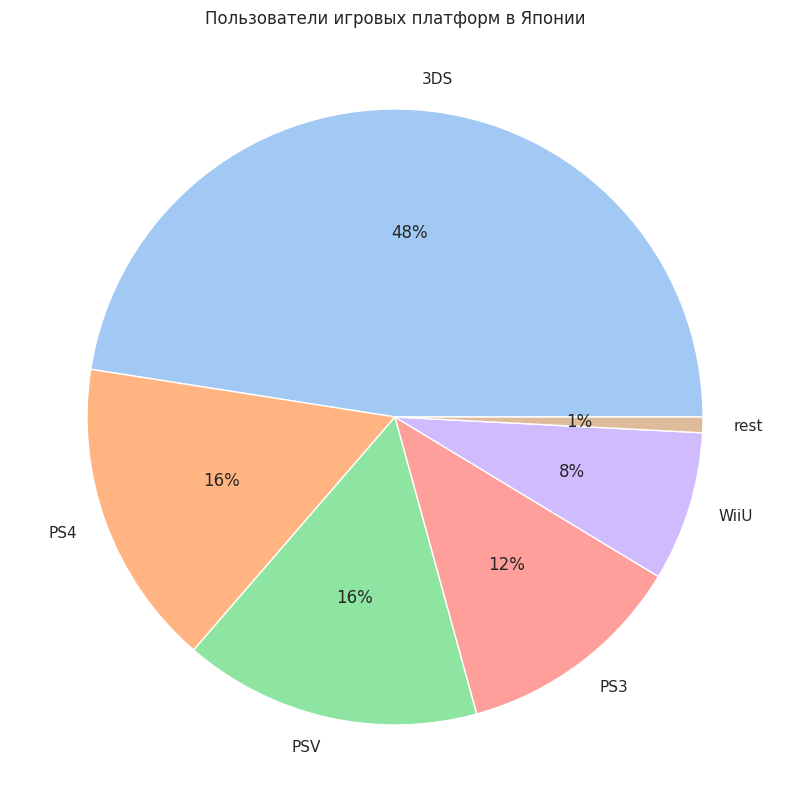

In [118]:
# посмотрим на круговой диаграмме доли по платформам
top_5 = list(jp_platform['jp_sales'][:5])
top_5.append(sum(list(jp_platform['jp_sales'][5:])))
labels_top_5 = list(jp_platform['platform'][:5])
labels_top_5.append('rest')


plt.rcParams["figure.figsize"] = (20,10)
colors = sns.color_palette('pastel')[ 0:6 ]
plt.title('Пользователи игровых платформ в Японии')
plt.pie(top_5, labels = labels_top_5, colors = colors, autopct='%.0f%%')
plt.show()

48% процентов пользователей из Японии предпочитают портативную консоль Nintendo 3DS, второе место делят Sony Playstation 4 и портативная консоль PlayStation Vita, далее PS3, а на пятом месте WiiU (опять же, частично являющаяся портативной).

* топ-5 жанров:

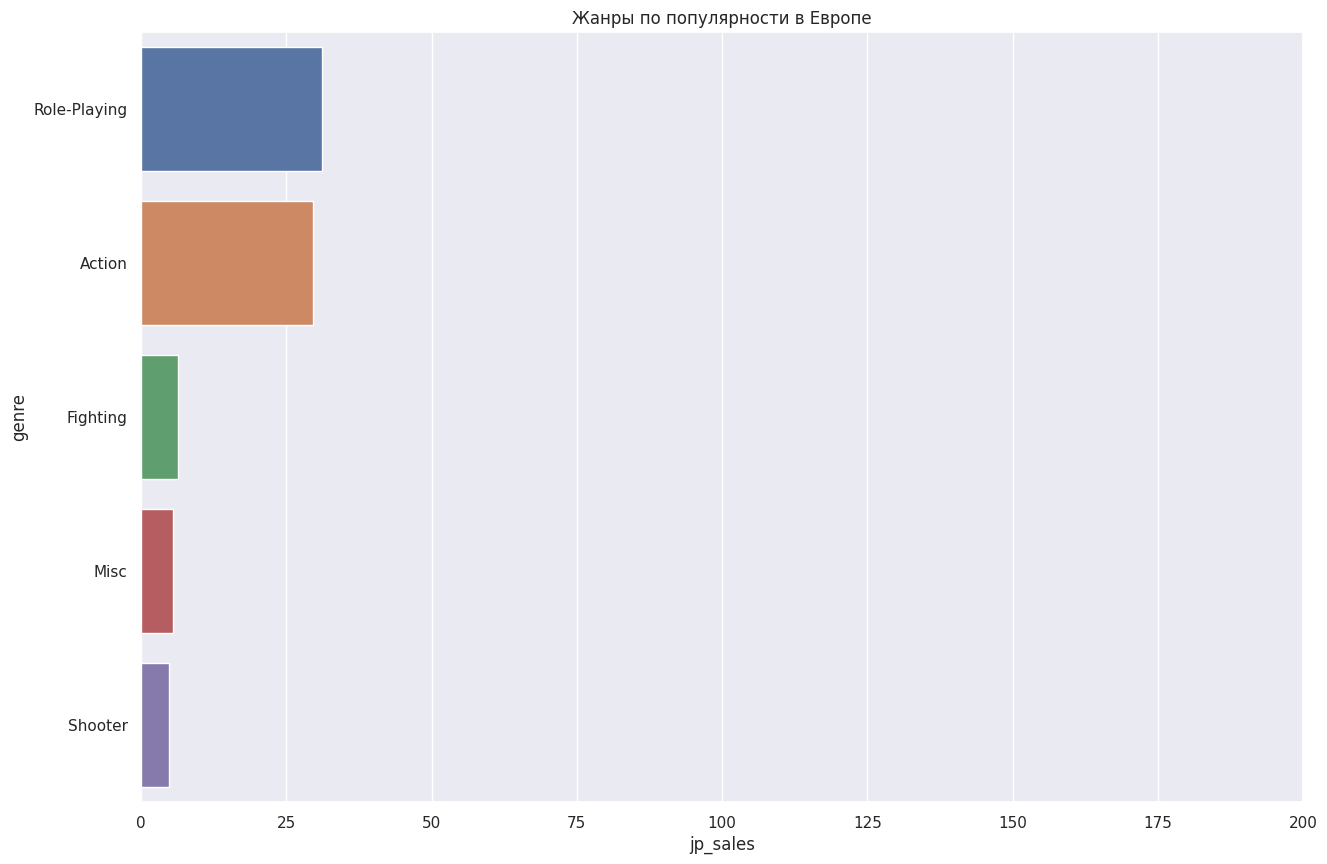

In [119]:
# сгруппируем данные по жанрам
jp_genre = df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(15, 10))
plt.xlim(0, 200)
sns.set(style="darkgrid")
plt.title('Жанры по популярности в Европе')
sns.barplot(x=jp_genre["jp_sales"][:5], y=jp_genre['genre'][:5], data=jp_genre)
plt.show()

Да, в шутеры на портативных консолях не погоняешь.

Первое место - RPG, на втором месте Action.

Дальше уже жанры с большим отрывом: файтинги, Misc, шутеры.

* влияние рейтинга ESRB на продажи:

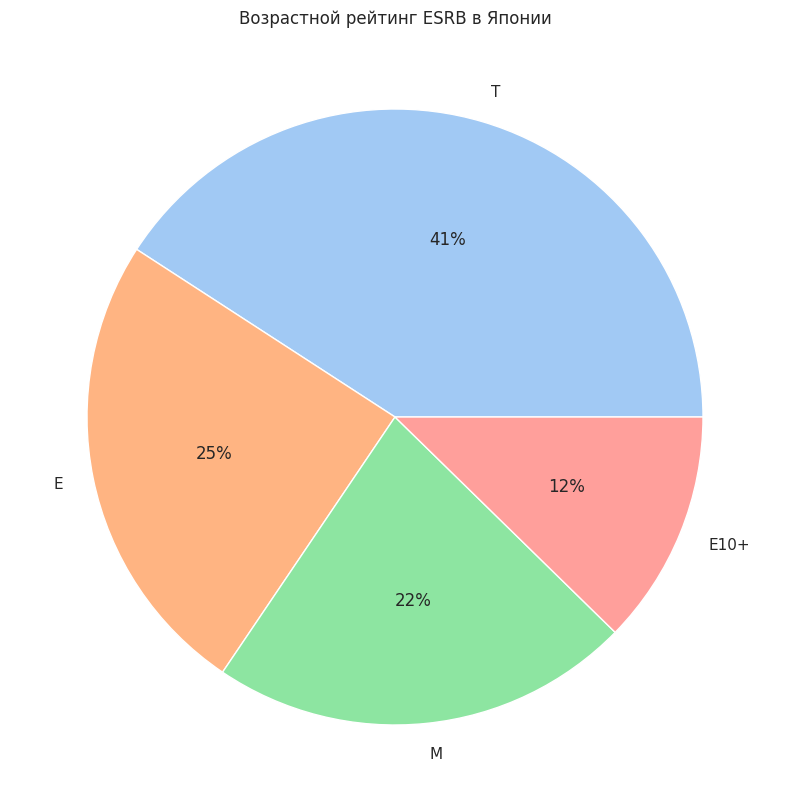

In [120]:
# сгруппируем данные по рейтингу
jp_esrb = df_actual.groupby('rating_esrb')['jp_sales'].sum().sort_values(ascending=False).reset_index()

# посмотрим на круговой диаграмме доли по платформам

plt.rcParams["figure.figsize"] = (20,10)
colors = sns.color_palette('pastel')[ 0:5 ]
plt.title('Возрастной рейтинг ESRB в Японии')
plt.pie(jp_esrb['jp_sales'], labels = jp_esrb['rating_esrb'], colors = colors, autopct='%.0f%%')
plt.show()

Похоже, что в Японии с возрастом перестают играть в видеоигры: самый распространенный рейтинг "Teen" - дети от 13 лет, далее идет "EveryOne", только после "Mature".



In [121]:
df_actual['rating_esrb'] = df_actual['rating_esrb'].fillna('unknown')

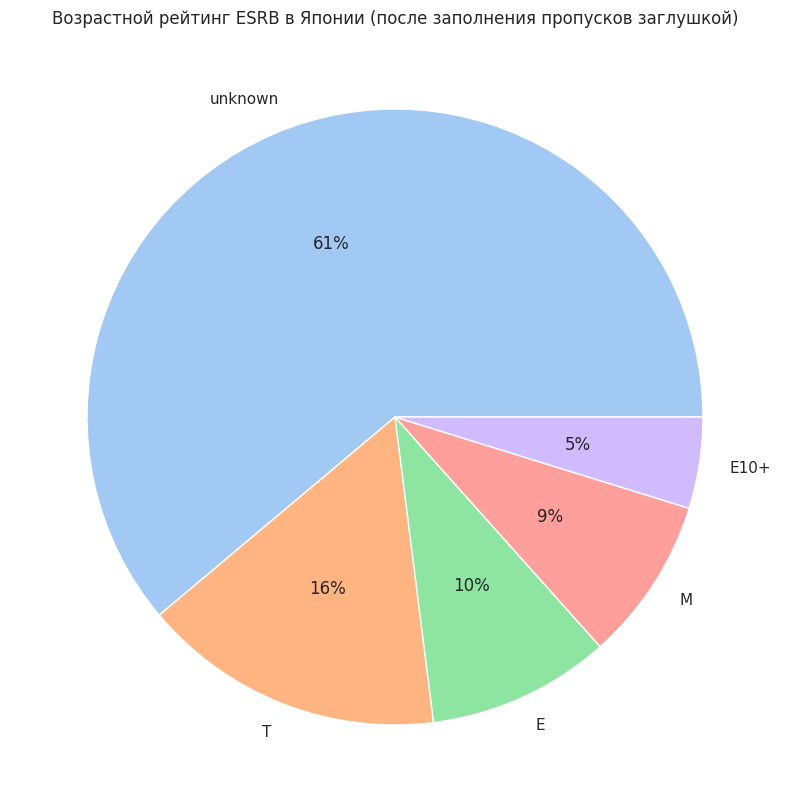

In [122]:
# сгруппируем данные по рейтингу
jp_esrb = df_actual.groupby('rating_esrb')['jp_sales'].sum().sort_values(ascending=False).reset_index()

# посмотрим на круговой диаграмме доли по платформам

plt.rcParams["figure.figsize"] = (20,10)
colors = sns.color_palette('pastel')[ 0:5 ]
plt.title('Возрастной рейтинг ESRB в Японии (после заполнения пропусков заглушкой)')
plt.pie(jp_esrb['jp_sales'], labels = jp_esrb['rating_esrb'], colors = colors, autopct='%.0f%%')
plt.show()

### **Промежуточный вывод**:

Данный шаг оказался очень важен для нас: при выборе потенциально успешной в плане прибыльности игры нам обязательно следует обращать внимание на регион сбыта.

Если рынок Северной Америки в целом схож с Европейским (за исключением предпочтения игровых платформ), Японский рынок направлен на более младшую категорию пользователей и в основе на портативные консоли. Однако, большую часть данных по рейтингу ESRB представляют пропуски.

## 5. Проверка гипотез <a id='section0.5'></a>

[Обратно к содержанию](#section0.100)

В этом разделе нашей работы нам предстоит проверить две гипотезы:

* а) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


* б) Средние пользовательские рейтинги жанров Action и Sports разные.

Начнем с первой гипотезы. Обозначим нулевую и альтернативную гипотезы:


* Н0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


* Н1 - средние пользовательские рейтинги платформ Xbox One и PC разные.

Подготовим данные:

In [123]:
# сохраняем в переменную все не NaN-оценки пользователей по играм для XBox One
xbox_one_user = df_actual.query('(user_score == user_score) and (platform == "XOne")')['user_score']

In [124]:
# сохраняем в переменную все не NaN-оценки пользователей по играм для PC
pc_user = df_actual.query('(user_score == user_score) and (platform == "PC")')['user_score']

Получилось 165 и 122 значений для оценок XBox и PC соответственно.

Оценим, как распределены наши значения:


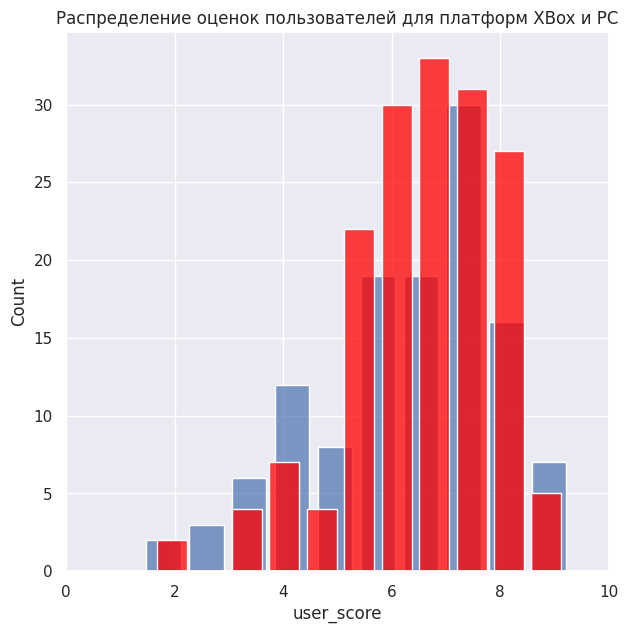

In [125]:
plt.figure(figsize=(7, 7))
plt.xlim(0, 10) 
sns.histplot(pc_user, alpha=0.7, bins=10, shrink=.8)
sns.histplot(xbox_one_user, color="red", bins=11, shrink=.8)
plt.title('Распределение оценок пользователей для платформ XBox и PC')
plt.show()

Распределены наши данные похожим образом. Для сравнения используем t-тест.
Пороговым значением выберем общепринятое в этом случае значение 0,05. Данная гипотеза двусторонняя.


In [126]:
alpha = 0.05

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xbox_one_user, pc_user)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Так как не получилось отвергнуть нулевую гипотезу, приходим к выводу, что **с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий**.

Проверим вторую гипотезу. Обозначим нулевую и альтернативную гипотезы:


* Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые;


* Н1 - средние пользовательские рейтинги жанров Action и Sports разные.

In [127]:
# сохраняем в переменную все не NaN-оценки пользователей по играм Action
action_user = df_actual.query('(user_score == user_score) and (genre == "Action")')['user_score']

In [128]:
# сохраняем в переменную все не NaN-оценки пользователей по играм Action
sports_user = df_actual.query('(user_score == user_score) and (genre == "Sports")')['user_score']

127 значений для спортивных игр и 297 значения для экшн-игр. Немного не честно, сделаем выборку одинаковой, по 127 элементов. С помощью библиотеки random случайным образом достанем 127 значений для экшн-игр:

In [129]:
# выбираем 127 случайных значений
action_user = random.choices(list(action_user), k=127)

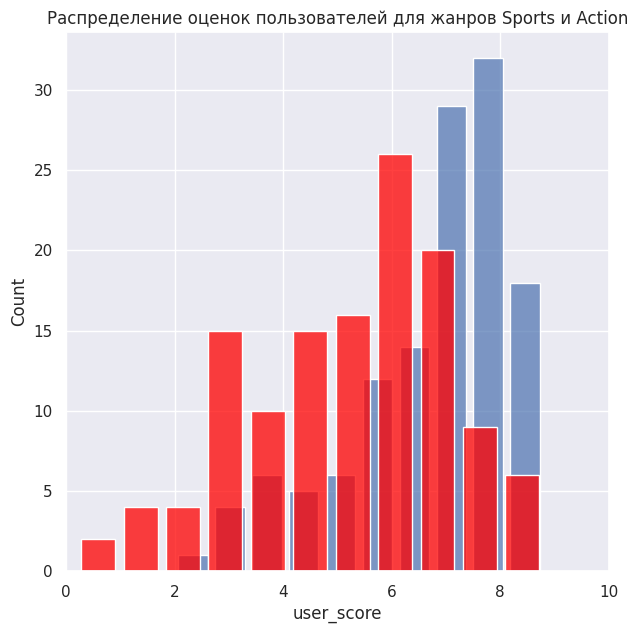

In [130]:
# посмотрим на распределение
plt.figure(figsize=(7, 7))
plt.xlim(0, 10) 
sns.histplot(action_user, alpha=0.7, bins=10, shrink=.8)
sns.histplot(sports_user, color="red", bins=11, shrink=.8)
plt.title('Распределение оценок пользователей для жанров Sports и Action')
plt.show()

Далее также проверим нашу гипотезу с помощью двустороннего t-теста. Пороговое значение возьмем как и в предыдущем шаге - 0,05:

In [131]:
alpha = 0.05

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(action_user, sports_user)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.525407144658412e-11
Отвергаем нулевую гипотезу


Напомню, что нулевая гипотеза означала то, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

Так как p-значение намного меньше порога, приходим к выводу, что **средние пользовательские рейтинги жанров Action и Sports разные**.

### **Промежуточный вывод**:

В этом разделе нашей работы мы провели t-тест и подтвердили гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC с большей вероятностью одинаковые. Для нас это означает, ориентируясь на среднюю оценку игр от пользователей, мы можем рассчитывать на взаимозаменяемость данных по отзывам для этих двух платформ.  

Также мы пришли к выводу, что средние пользовательские рейтинги жанров Action и Sports с большей вероятностью отличаются между собой.

## 6. Общий вывод по работе <a id='section0.6'></a>

[Обратно к содержанию](#section0.100)

- В начале исследования мы предобработали данные, изменив названия столбцов, обработали пропуски, сделали    подходящий тип данных во всех ячейках, где удалось избавиться от пропусков. Сделали проверку на дубликаты, а также добавили новый столбец с общей суммой проданных игр по всем регионам. 

-----

- По ходу выполнения работы мы оставляли промежуточные выводы.
    
----

- Приведем комментарии здесь:
    - мы изучили, что индустрия видеоигр активно развивалась со второй пловины 90-х годов, а пик ее пришелся на 2008 - 2010 года.
    - смогли измерить "жизненный" цикл игровой платформы: 9-11 лет, пик продаж обычно приходится на середину этого срока. Компьютер как игровая платформа имеет индивидуальное распределение популярности.
    - выбрали для прогнозирования период с 2014 по 2016 годы.
    - потенциально прибыльными платформами на грядущий год на данный момент являются Sony Playstation 4 и XBox One, а из портативных WiiU.
    - самыми прибыльными жанрами оказались экшн-игры, шутеры и RPG.
 
----

- Общее представление потенциально прибыльно игры следующее:
    - платформа - `Sony Playstation 4` и `XBox One`;
    - жанры - экшн-игры, шутеры, RPG, спортивные симуляторы.
    - необходимо учитывать оценку критиков, прогнозируя успех игры.
    
    
- При всем при этом необходимо отметить, что на трех рынках сбыта имеются свои особенности, а соответственно, свой потенциально успешный продукт.
Таким образом рынок Северной Америки и Европы схож, однако в Европе сильнее распространены игры для компьютера. А рынок Японии значительно отличается от первых двух: здесь нужно делать акцент на игры для           портативных консолей и контент для подростков.

    
----
